### Enlève les attributs non essentiel pour le projet

### PIP

In [57]:
!pip install nltk

In [58]:
!pip install bertopic

In [59]:
!pip install top2vec
!pip install top2vec[sentence_encoders]
!pip install top2vec[sentence_transformers]
!pip install top2vec[indexing]

In [60]:
!pip install tensorflow tensorflow_hub tensorflow_text

In [61]:
!pip install --upgrade tensorflow-probability keras

In [62]:
!pip install --upgrade top2vec

### IMPORT

In [63]:
import pandas as pd

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from scipy.stats import boxcox
import random


In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

### Stats Données et MERGE

In [68]:
_posts = pd.read_csv('/content/Posts.csv')
_comments = pd.read_csv('/content/Comments.csv')

print(_posts.columns)
print(_comments.columns)

#Retirer les attributs non importants comme l'id,parent et postId

Index(['attachments.data', 'created_time', 'id', 'mainTopic', 'message',
       'permalink_url', 'secondTopic', 'shares', 'title'],
      dtype='object')
Index(['IDENTITY_ATTACK', 'INSULT', 'PROFANITY', 'SEVERE_TOXICITY', 'THREAT',
       'TOXICITY', 'comment_count', 'created_time', 'id', 'like_count',
       'message', 'parent', 'postId'],
      dtype='object')


In [69]:
_comments.describe()

IDENTITY_ATTACK         INSULT      PROFANITY  SEVERE_TOXICITY  \
count     9.356980e+05  935698.000000  935698.000000     9.356980e+05   
mean      1.141216e-02       0.108959       0.052533     1.360216e-02   
std       4.006699e-02       0.162994       0.119968     5.610636e-02   
min       3.613072e-08       0.002280       0.000000     3.725290e-08   
25%       5.225947e-04       0.009470       0.008879     4.220009e-04   
50%       1.581658e-03       0.027476       0.011270     1.215935e-03   
75%       5.475683e-03       0.136078       0.022150     4.673004e-03   
max       9.491525e-01       0.973575       0.998037     9.502075e-01   

              THREAT       TOXICITY  comment_count     like_count  
count  935698.000000  935698.000000  935698.000000  935698.000000  
mean        0.010173       0.102460       0.520507       1.321623  
std         0.035129       0.140141       2.988751       5.972633  
min         0.000000       0.000005       0.000000       0.000000  
25%         0.005321       0.008294       0.000000       0.000000  
50%         0.005495       0.034277       0.000000       0.000000  
75%         0.006233       0.151034       0.000000       1.000000  
max         0.968038       0.981763     252.000000     836.000000

In [70]:
merged_df = pd.merge(_comments, _posts, how='inner', left_on='postId', right_on='id', suffixes=('_comments', '_posts'))

In [71]:
print(merged_df.columns)

Index(['IDENTITY_ATTACK', 'INSULT', 'PROFANITY', 'SEVERE_TOXICITY', 'THREAT',
       'TOXICITY', 'comment_count', 'created_time_comments', 'id_comments',
       'like_count', 'message_comments', 'parent', 'postId',
       'attachments.data', 'created_time_posts', 'id_posts', 'mainTopic',
       'message_posts', 'permalink_url', 'secondTopic', 'shares', 'title'],
      dtype='object')


In [72]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935698 entries, 0 to 935697
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   IDENTITY_ATTACK        935698 non-null  float64
 1   INSULT                 935698 non-null  float64
 2   PROFANITY              935698 non-null  float64
 3   SEVERE_TOXICITY        935698 non-null  float64
 4   THREAT                 935698 non-null  float64
 5   TOXICITY               935698 non-null  float64
 6   comment_count          935698 non-null  int64  
 7   created_time_comments  935698 non-null  object 
 8   id_comments            935698 non-null  object 
 9   like_count             935698 non-null  int64  
 10  message_comments       935698 non-null  object 
 11  parent                 476037 non-null  object 
 12  postId                 935698 non-null  object 
 13  attachments.data       935663 non-null  object 
 14  created_time_posts     935698 non-nu

In [73]:
merged_df.describe()

IDENTITY_ATTACK         INSULT      PROFANITY  SEVERE_TOXICITY  \
count     9.356980e+05  935698.000000  935698.000000     9.356980e+05   
mean      1.141216e-02       0.108959       0.052533     1.360216e-02   
std       4.006699e-02       0.162994       0.119968     5.610636e-02   
min       3.613072e-08       0.002280       0.000000     3.725290e-08   
25%       5.225947e-04       0.009470       0.008879     4.220009e-04   
50%       1.581658e-03       0.027476       0.011270     1.215935e-03   
75%       5.475683e-03       0.136078       0.022150     4.673004e-03   
max       9.491525e-01       0.973575       0.998037     9.502075e-01   

              THREAT       TOXICITY  comment_count     like_count  \
count  935698.000000  935698.000000  935698.000000  935698.000000   
mean        0.010173       0.102460       0.520507       1.321623   
std         0.035129       0.140141       2.988751       5.972633   
min         0.000000       0.000005       0.000000       0.000000   
25%         0.005321       0.008294       0.000000       0.000000   
50%         0.005495       0.034277       0.000000       0.000000   
75%         0.006233       0.151034       0.000000       1.000000   
max         0.968038       0.981763     252.000000     836.000000   

              shares  
count  935698.000000  
mean      285.970075  
std      1853.642335  
min         0.000000  
25%         7.000000  
50%        27.000000  
75%       110.000000  
max     25872.000000

In [74]:
# Select only non-numerical columns
non_numeric_columns = merged_df.select_dtypes(exclude=['number']).columns
non_numeric_df = merged_df[non_numeric_columns]
non_numeric_df

created_time_comments                        id_comments  \
0       2023-06-02T16:06:59+0000    722477749883613_788168749338745   
1       2023-06-02T16:21:43+0000   722477749883613_1593974021087773   
2       2023-06-02T17:29:58+0000    722477749883613_779062990381463   
3       2023-06-02T17:38:16+0000   722477749883613_1209409703068880   
4       2023-06-02T17:39:15+0000    722477749883613_959208781890324   
...                          ...                                ...   
935693  2021-09-23T04:44:19+0000  6994109217281174_7002848653073897   
935694  2021-09-23T12:14:23+0000  6994109217281174_7004651112893651   
935695  2021-09-23T12:17:03+0000  6994109217281174_7004664122892350   
935696  2021-09-23T12:24:39+0000  6994109217281174_7004701866221909   
935697  2021-09-24T16:23:02+0000  6994109217281174_7012448248780604   

                                         message_comments  \
0       Faux, ce ne sera jamais le temps pour lui car ...   
1       Mon dieu!! On nous prend sérieusement pour des...   
2       Denise Morais ..Oui et avec raison ! (Car "nou...   
3       Gros show. Mais pendant la plandémie chinoise ...   
4       On apellait ça chinada pis les vaxxinés compre...   
...                                                   ...   
935693  Marcel Routhier si tu n'as pas entendu parler ...   
935694  Gaston Crete en 2002 c,était Rémy Trudel et 20...   
935695  Gaston Crete et c,est là Marois qui a parti le...   
935696  Ils commencent à se fâcher le monde  ne veulen...   
935697                                           Bullshit   

                                   parent                            postId  \
0                                     NaN   192978590727638_722477749883613   
1                                     NaN   192978590727638_722477749883613   
2        722477749883613_1593974021087773   192978590727638_722477749883613   
3                                     NaN   192978590727638_722477749883613   
4                                     NaN   192978590727638_722477749883613   
...                                   ...                               ...   
935693  6994109217281174_6995332773825485  192978590727638_6994109217281174   
935694  6994109217281174_6994381837253912  192978590727638_6994109217281174   
935695  6994109217281174_6994381837253912  192978590727638_6994109217281174   
935696                                NaN  192978590727638_6994109217281174   
935697                                NaN  192978590727638_6994109217281174   

                                         attachments.data  \
0       [{"title":"Les incohérences de l’ingérence","u...   
1       [{"title":"Les incohérences de l’ingérence","u...   
2       [{"title":"Les incohérences de l’ingérence","u...   
3       [{"title":"Les incohérences de l’ingérence","u...   
4       [{"title":"Les incohérences de l’ingérence","u...   
...                                                   ...   
935693  [{"title":"La CAQ prévoit améliorer les condit...   
935694  [{"title":"La CAQ prévoit améliorer les condit...   
935695  [{"title":"La CAQ prévoit améliorer les condit...   
935696  [{"title":"La CAQ prévoit améliorer les condit...   
935697  [{"title":"La CAQ prévoit améliorer les condit...   

              created_time_posts                          id_posts  \
0       2023-06-02T16:03:24+0000   192978590727638_722477749883613   
1       2023-06-02T16:03:24+0000   192978590727638_722477749883613   
2       2023-06-02T16:03:24+0000   192978590727638_722477749883613   
3       2023-06-02T16:03:24+0000   192978590727638_722477749883613   
4       2023-06-02T16:03:24+0000   192978590727638_722477749883613   
...                          ...                               ...   
935693  2021-09-21T18:14:39+0000  192978590727638_6994109217281174   
935694  2021-09-21T18:14:39+0000  192978590727638_6994109217281174   
935695  2021-09-21T18:14:39+0000  192978590727638_6994109217281174   
935696  2021-09-21T18:14:39+0000  192978590

In [75]:
# Attributs non essentiel
null_attributs = ['id_posts','id_comments','parent','postId','permalink_url','attachments.data']

merged_clean_df = merged_df.drop(null_attributs, axis=1)
merged_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935698 entries, 0 to 935697
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   IDENTITY_ATTACK        935698 non-null  float64
 1   INSULT                 935698 non-null  float64
 2   PROFANITY              935698 non-null  float64
 3   SEVERE_TOXICITY        935698 non-null  float64
 4   THREAT                 935698 non-null  float64
 5   TOXICITY               935698 non-null  float64
 6   comment_count          935698 non-null  int64  
 7   created_time_comments  935698 non-null  object 
 8   like_count             935698 non-null  int64  
 9   message_comments       935698 non-null  object 
 10  created_time_posts     935698 non-null  object 
 11  mainTopic              927217 non-null  object 
 12  message_posts          925540 non-null  object 
 13  secondTopic            868622 non-null  object 
 14  shares                 935698 non-nu

In [76]:
# met les comment_count en binaire
# Remplacer les valeurs de comment_count
merged_clean_df['comment_count'] = merged_clean_df['comment_count'].apply(lambda x: 1 if x > 0 else 0)


Text(0, 0.5, 'Valeurs')

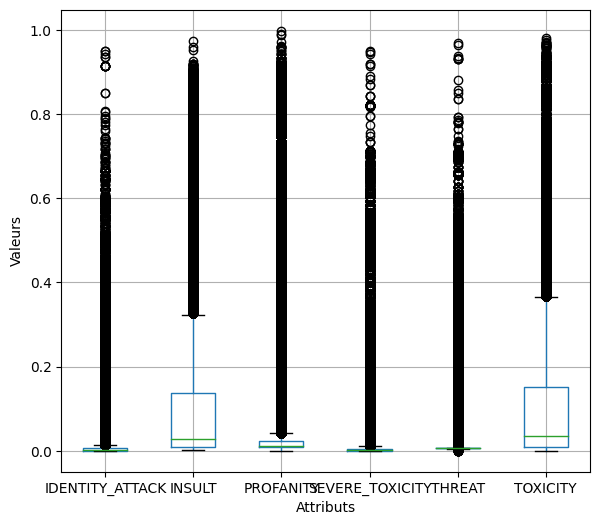

In [77]:
import matplotlib.pyplot as plt

# Création de la troisième figure avec une largeur personnalisée
plt.figure(figsize=(15, 6))  # Définition de la largeur de la figure
plt.subplot(1, 2, 2)  # 1 ligne, 3 colonnes, troisième figure
merged_clean_df.boxplot(column=['IDENTITY_ATTACK', 'INSULT', 'PROFANITY', 'SEVERE_TOXICITY', 'THREAT', 'TOXICITY'])  # Boxplot pour plusieurs colonnes

plt.xlabel('Attributs')  # Ajout de l'étiquette de l'axe des x
plt.ylabel('Valeurs')  # Ajout de l'étiquette de l'axe des y

# Affichage des figures
# plt.tight_layout()  # Ajustement automatique de l'espacement entre les sous-graphiques
# plt.show()



Text(0, 0.5, 'Valeurs')

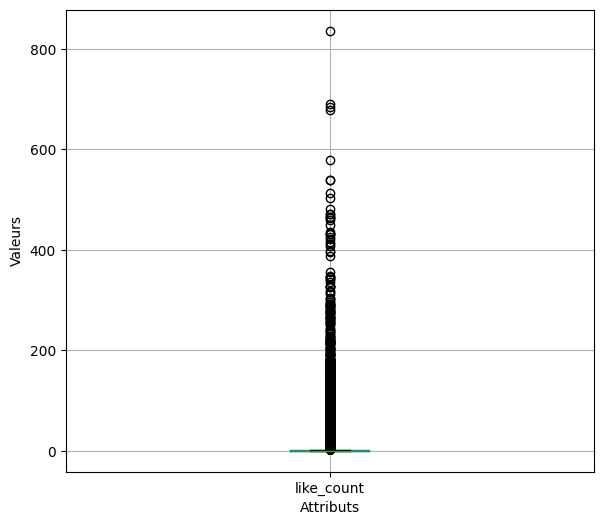

In [78]:
plt.figure(figsize=(15, 6))  # Définition de la largeur de la figure
plt.subplot(1, 2, 2)  # 1 ligne, 3 colonnes, troisième figure
merged_clean_df.boxplot(column=['like_count'])  # Boxplot pour plusieurs colonnes

plt.xlabel('Attributs')  # Ajout de l'étiquette de l'axe des x
plt.ylabel('Valeurs')  # Ajout de l'étiquette de l'axe des y

Text(0, 0.5, 'Valeurs')

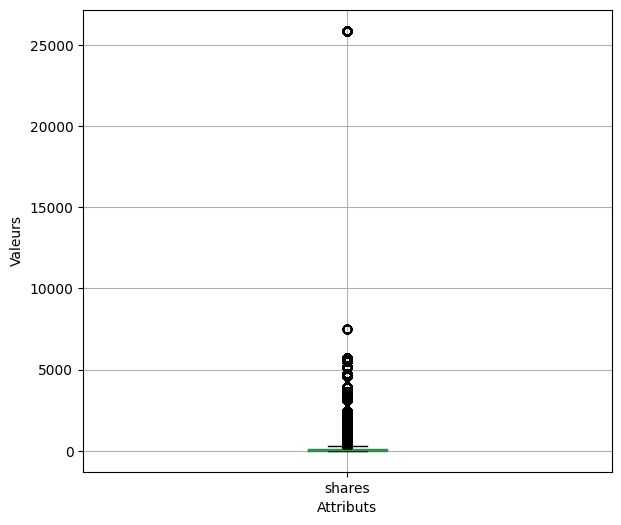

In [79]:
plt.figure(figsize=(15, 6))  # Définition de la largeur de la figure
plt.subplot(1, 2, 2)  # 1 ligne, 3 colonnes, troisième figure
merged_clean_df.boxplot(column=['shares'])  # Boxplot pour plusieurs colonnes

plt.xlabel('Attributs')  # Ajout de l'étiquette de l'axe des x
plt.ylabel('Valeurs')  # Ajout de l'étiquette de l'axe des y

In [80]:
def add_constant_and_log_transform(df, column_name, constant=0.5):
    """
    Ajoute une constante à toutes les valeurs d'une colonne dans un DataFrame,
    puis applique une transformation logarithmique.

    Arguments :
    df : DataFrame
        Le DataFrame contenant les données.
    column_name : str
        Le nom de la colonne à transformer.
    constant : float, optionnel
        La constante à ajouter à toutes les valeurs (par défaut : 1).

    Retourne :
    DataFrame
        Un DataFrame avec la colonne transformée.
    """
    df_transformed = df.copy()
    df_transformed[column_name] = np.log(df_transformed[column_name] + constant)
    return df_transformed


In [81]:
def square_root_transform(df, column_name):
    """
    Applique une transformation racine carrée à une colonne spécifique dans un DataFrame.

    Arguments :
    df : DataFrame
        Le DataFrame contenant les données.
    column_name : str
        Le nom de la colonne à transformer.

    Retourne :
    DataFrame
        Un DataFrame avec la colonne transformée.
    """
    df_transformed = df.copy()
    df_transformed[column_name] = np.sqrt(df_transformed[column_name])
    return df_transformed

In [82]:
def normalize_columns(df, columns):
    """
    Normalise les valeurs des colonnes spécifiées dans un DataFrame.

    Arguments :
    df : DataFrame
        Le DataFrame contenant les données.
    columns : liste
        La liste des noms de colonnes à normaliser.

    Retourne :
    DataFrame
        Un DataFrame avec les valeurs des colonnes normalisées.
    """
    df_normalized = df.copy()
    scaler = StandardScaler()
    df_normalized[columns] = scaler.fit_transform(df_normalized[columns])
    return df_normalized

In [83]:
# Calcul de la limite supérieure et inférieure pour chaque colonne
def remove_outliers(df, columns):
    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [84]:
# Calcul de la limite supérieure et inférieure pour chaque colonne
def detect_outliers(df, columns):
    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[column] >= lower_bound) | (df[column] <= upper_bound)]
    return df[(df[column] >= lower_bound) | (df[column] <= upper_bound)]

In [85]:
columns_to_check=['IDENTITY_ATTACK', 'INSULT', 'PROFANITY', 'SEVERE_TOXICITY', 'THREAT', 'TOXICITY','like_count','shares']
merged_clean_df_normalize = normalize_columns(merged_clean_df, columns_to_check)
# merged_clean_df_log_transform = add_constant_and_log_transform(merged_clean_df_normalize,columns_to_check)

merged_clean_df_sqrt_transform = square_root_transform(merged_clean_df_normalize,columns_to_check)


# merged_clean_df_without_outliers = remove_outliers(merged_clean_df_log_transform, columns_to_check)



In [86]:
columns_to_check=['IDENTITY_ATTACK', 'INSULT', 'PROFANITY', 'SEVERE_TOXICITY', 'THREAT', 'TOXICITY','like_count','shares']
def percentage_outliers(df, columns_to_check):
    """
    Calcule le pourcentage d'outliers détectés à l'aide d'un boxplot pour chaque colonne spécifiée dans un DataFrame.

    Arguments :
    df : DataFrame
        Le DataFrame contenant les données.
    columns_to_check : list
        Liste des noms de colonnes à analyser.

    Retourne :
    dict
        Un dictionnaire contenant les pourcentages d'outliers pour chaque colonne.
    """
    percentages = {}
    for column_name in columns_to_check:
        # Calcul des quartiles
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)

        # Calcul de l'amplitude interquartile (IQR)
        IQR = Q3 - Q1

        # Détermination des limites inférieure et supérieure du boxplot
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identification des outliers
        outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

        # Calcul du pourcentage d'outliers
        percentage = len(outliers) / len(df) * 100

        # Stockage du pourcentage dans le dictionnaire
        percentages[column_name] = percentage

    return percentages

# Exemple d'utilisation :
# Supposons que 'df' est votre DataFrame et 'columns_to_check' est la liste des colonnes à analyser
pourcentages_out = percentage_outliers(merged_clean_df, columns_to_check)
print("Pourcentages d'outliers détectés par colonne :", pourcentages_out)

Pourcentages d'outliers détectés par colonne : {'IDENTITY_ATTACK': 13.710406562801245, 'INSULT': 13.195069349298599, 'PROFANITY': 17.66317764919878, 'SEVERE_TOXICITY': 14.956214505107418, 'THREAT': 12.400582239141261, 'TOXICITY': 7.127406492265667, 'like_count': 12.172730945240879, 'shares': 11.962192929770076}


In [87]:
# # Boucle sur chaque colonne à transformer
# for colonne in columns_to_check:
#     if colonne in merged_clean_df_log_transform.columns :
#         # Supprimer la constante de la colonne
#         merged_clean_df_log_transform[colonne] = merged_clean_df_log_transform[colonne] - 0.5

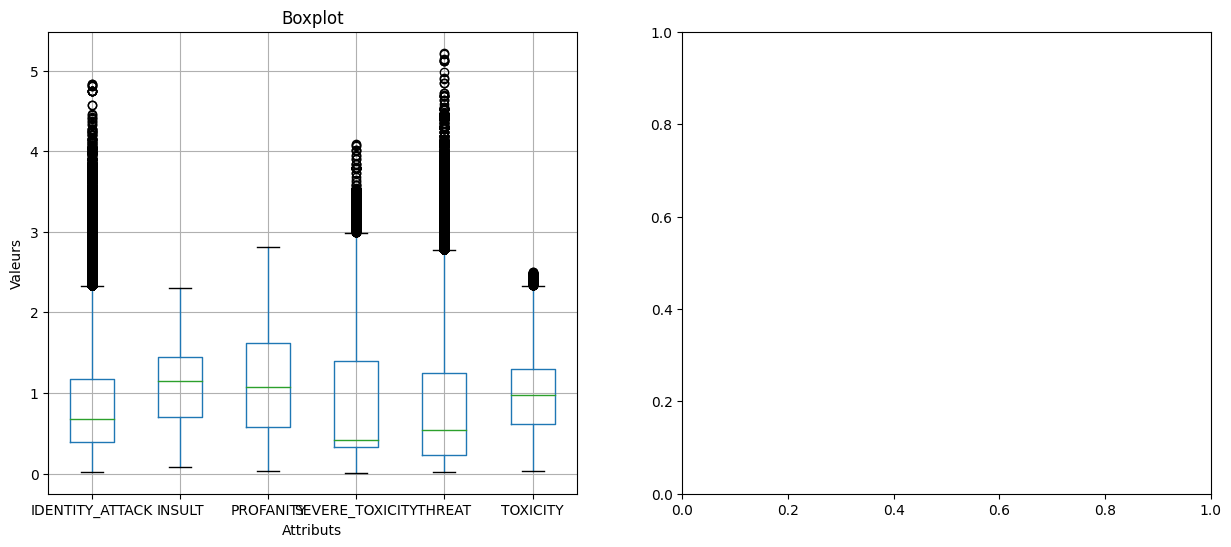

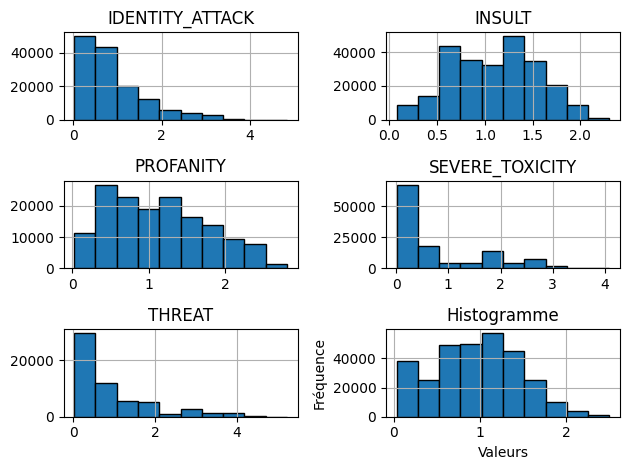

In [88]:
# Définition de la taille de la figure
plt.figure(figsize=(15, 6))

# Tracé du boxplot
plt.subplot(1, 2, 1)
merged_clean_df_sqrt_transform.boxplot(column=['IDENTITY_ATTACK', 'INSULT', 'PROFANITY', 'SEVERE_TOXICITY', 'THREAT', 'TOXICITY'])
plt.title('Boxplot')
plt.xlabel('Attributs')
plt.ylabel('Valeurs')

# Tracé de l'histogramme
plt.subplot(1, 2, 2)
merged_clean_df_sqrt_transform.hist(column=['IDENTITY_ATTACK', 'INSULT', 'PROFANITY', 'SEVERE_TOXICITY', 'THREAT', 'TOXICITY'], bins=10, edgecolor='black')
plt.title('Histogramme')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')

# Affichage du graphique
plt.tight_layout()
plt.show()



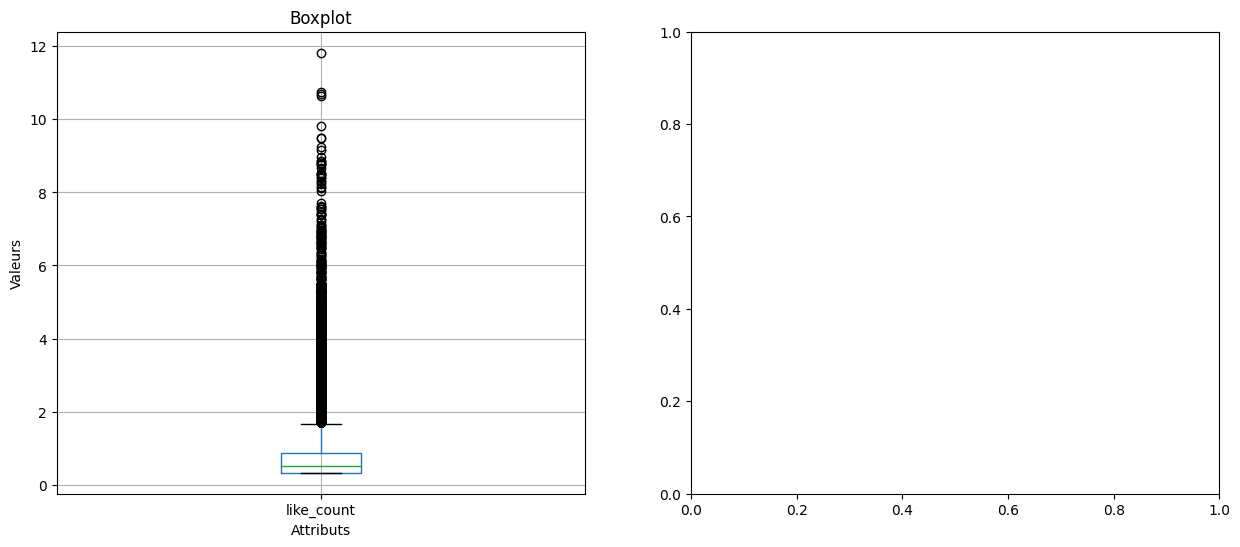

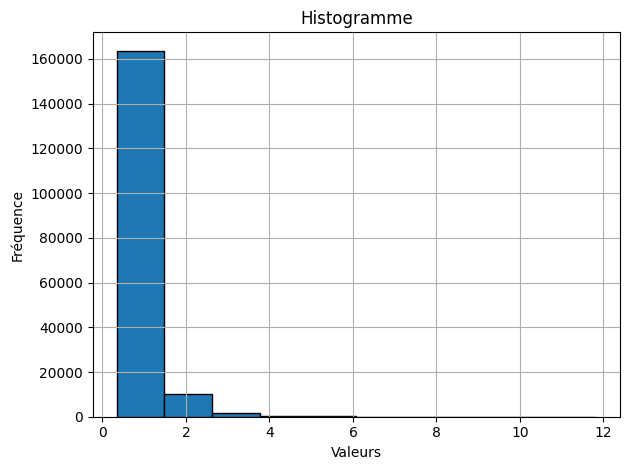

In [89]:
# Définition de la taille de la figure
plt.figure(figsize=(15, 6))

# Tracé du boxplot
plt.subplot(1, 2, 1)
merged_clean_df_sqrt_transform.boxplot(column=['like_count'])
plt.title('Boxplot')
plt.xlabel('Attributs')
plt.ylabel('Valeurs')

# Tracé de l'histogramme
plt.subplot(1, 2, 2)
merged_clean_df_sqrt_transform.hist(column=['like_count'], bins=10, edgecolor='black')
plt.title('Histogramme')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')

# Affichage du graphique
plt.tight_layout()
plt.show()


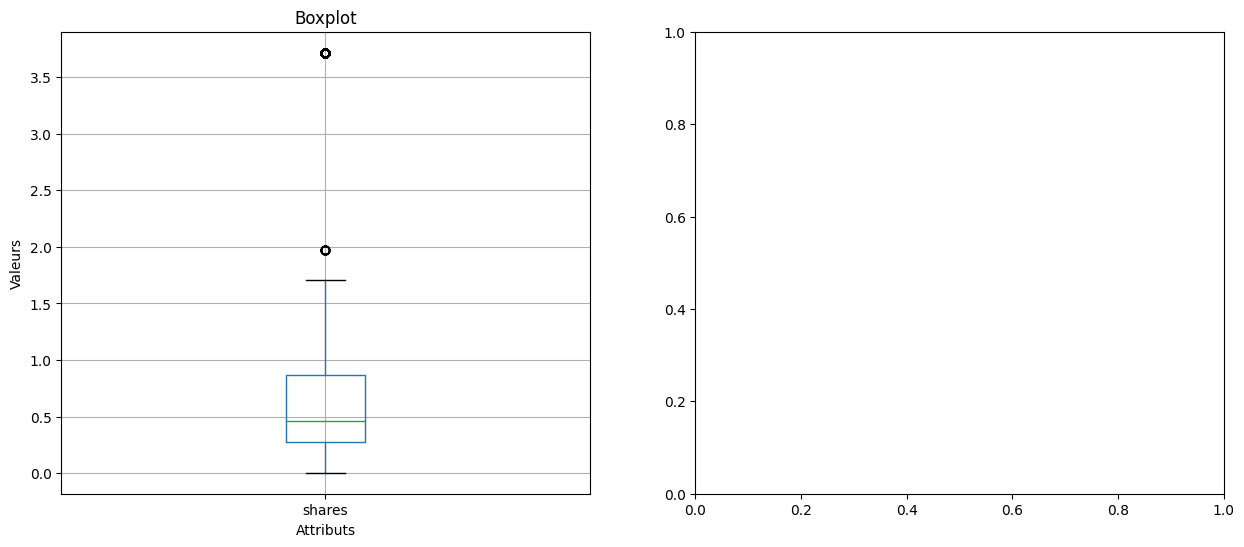

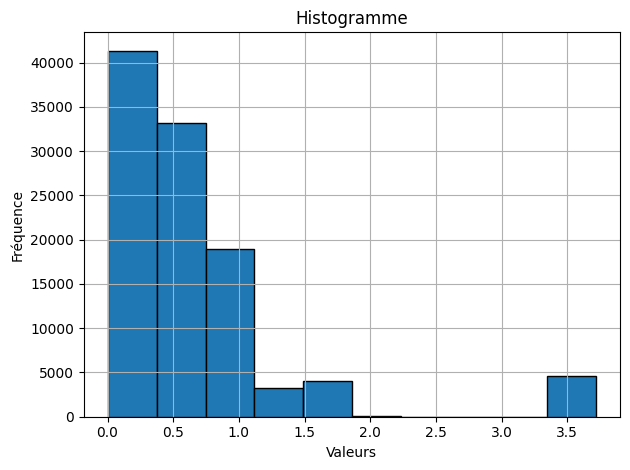

In [90]:
# Définition de la taille de la figure
plt.figure(figsize=(15, 6))

# Tracé du boxplot
plt.subplot(1, 2, 1)
merged_clean_df_sqrt_transform.boxplot(column=['shares'])
plt.title('Boxplot')
plt.xlabel('Attributs')
plt.ylabel('Valeurs')

# Tracé de l'histogramme
plt.subplot(1, 2, 2)
merged_clean_df_sqrt_transform.hist(column=['shares'], bins=10, edgecolor='black')
plt.title('Histogramme')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')

# Affichage du graphique
plt.tight_layout()
plt.show()

In [91]:
merged_clean_df_sqrt_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935698 entries, 0 to 935697
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   IDENTITY_ATTACK        139462 non-null  float64
 1   INSULT                 247769 non-null  float64
 2   PROFANITY              151398 non-null  float64
 3   SEVERE_TOXICITY        121023 non-null  float64
 4   THREAT                 58975 non-null   float64
 5   TOXICITY               304174 non-null  float64
 6   comment_count          935698 non-null  int64  
 7   created_time_comments  935698 non-null  object 
 8   like_count             175842 non-null  float64
 9   message_comments       935698 non-null  object 
 10  created_time_posts     935698 non-null  object 
 11  mainTopic              927217 non-null  object 
 12  message_posts          925540 non-null  object 
 13  secondTopic            868622 non-null  object 
 14  shares                 105338 non-nu

### Traitement des valeurs numériques

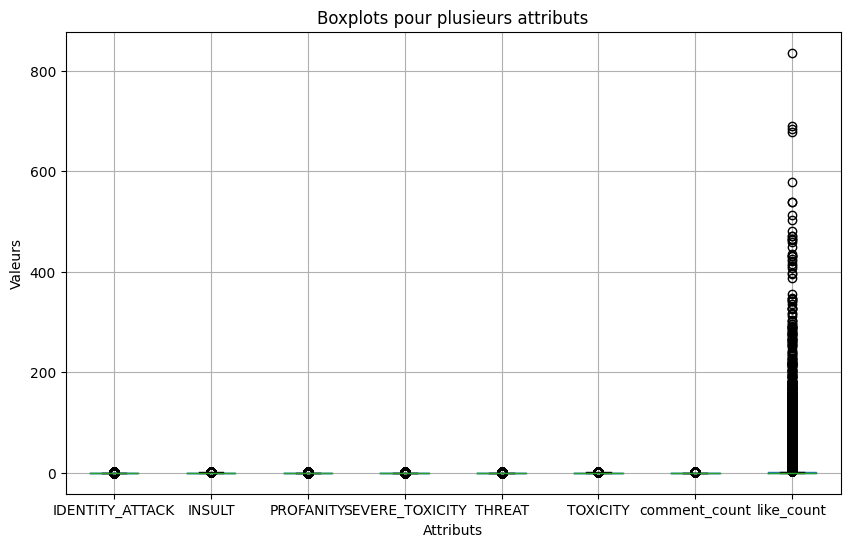

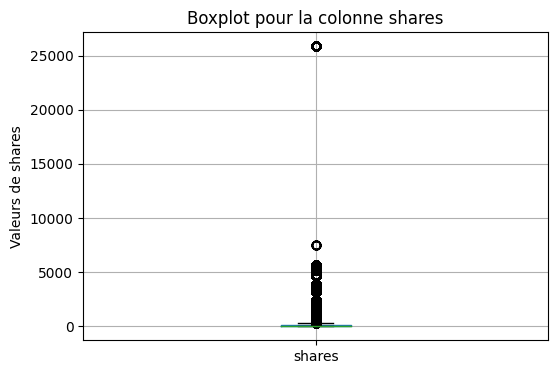

In [ ]:
# Normalisation Min-Max de la colonne 'like_count'
# merged_clean_df['like_count_norm'] = (merged_clean_df['like_count'] - merged_clean_df['like_count'].min()) / (merged_clean_df['like_count'].max() - merged_clean_df['like_count'].min())

# Suppression de la colonne originale 'like_count'
# merged_clean_df.drop('like_count', axis=1, inplace=True)

# Sélection des colonnes numériques sauf 'shares'
colonnes_numeriques_sauf_shares = merged_clean_df.drop('shares', axis=1)

# Création du boxplot avec Matplotlib
plt.figure(figsize=(10, 6))  # Définition de la taille de la figure
colonnes_numeriques_sauf_shares.boxplot()  # Création des boxplots pour chaque colonne du DataFrame
plt.title('Boxplots pour plusieurs attributs')  # Ajout du titre
plt.xlabel('Attributs')  # Ajout de l'étiquette de l'axe des x
plt.ylabel('Valeurs')  # Ajout de l'étiquette de l'axe des y
plt.show()  # Affichage de la figure


# Création du boxplot pour la colonne 'shares'
plt.figure(figsize=(6, 4))
merged_clean_df[['shares']].boxplot()
plt.title('Boxplot pour la colonne shares')
plt.ylabel('Valeurs de shares')
plt.show()

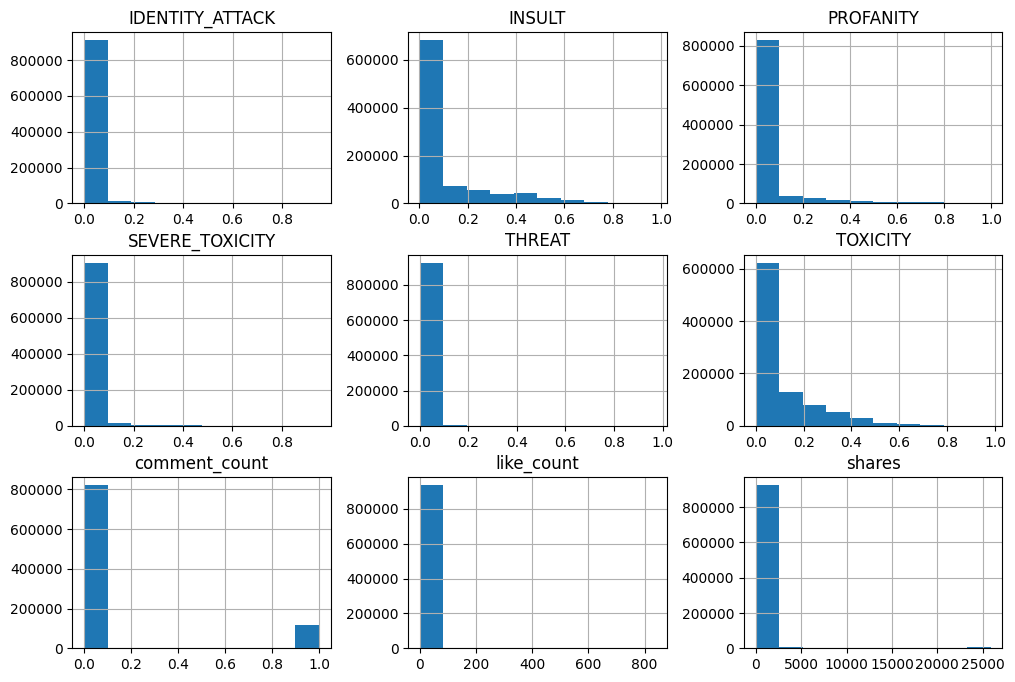

In [ ]:
import matplotlib.pyplot as plt

merged_clean_df.hist(bins=10, figsize=(12,8))
plt.show()

In [ ]:
def replace_outliers_with_mean(df, column_name, num_std=3):

    # Calculate mean and standard deviation of the column
    mean = df[column_name].mean()
    std = df[column_name].std()

    # Determine lower and upper bounds
    lower_bound = mean - num_std * std
    upper_bound = mean + num_std * std

    # Replace outliers with the mean of the column
    df[column_name] = np.where((df[column_name] < lower_bound) | (df[column_name] > upper_bound), mean, df[column_name])

    return df

In [ ]:
merged_clean_df = replace_outliers_with_mean(merged_clean_df,'IDENTITY_ATTACK')
merged_clean_df = replace_outliers_with_mean(merged_clean_df,'like_count')
merged_clean_df = replace_outliers_with_mean(merged_clean_df,'INSULT')
merged_clean_df = replace_outliers_with_mean(merged_clean_df,'PROFANITY')
merged_clean_df = replace_outliers_with_mean(merged_clean_df,'SEVERE_TOXICITY')
merged_clean_df = replace_outliers_with_mean(merged_clean_df,'THREAT')
merged_clean_df = replace_outliers_with_mean(merged_clean_df,'TOXICITY')

In [ ]:
merged_clean_df = replace_outliers_with_mean(merged_clean_df,'shares')

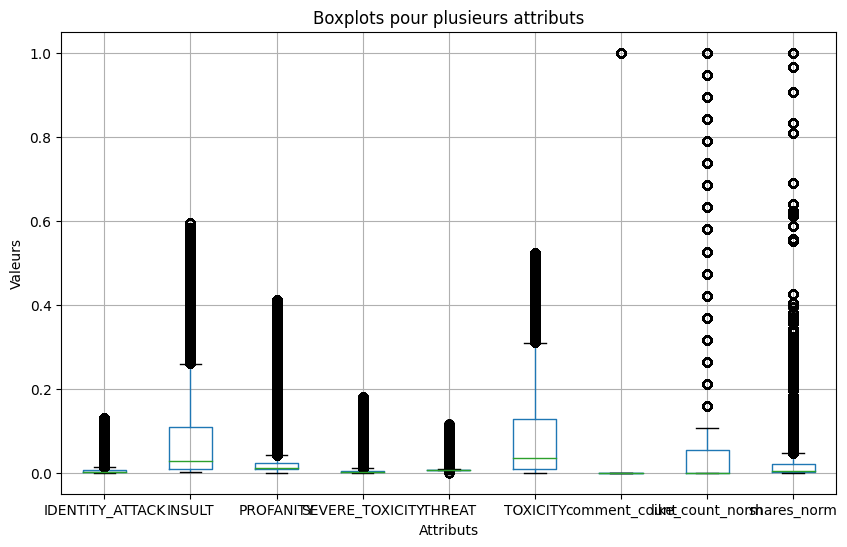

In [ ]:
# Normalisation Min-Max de la colonne 'like_count'
merged_clean_df['like_count_norm'] = (merged_clean_df['like_count'] - merged_clean_df['like_count'].min()) / (merged_clean_df['like_count'].max() - merged_clean_df['like_count'].min())

# Normalisation Min-Max de la colonne 'like_count'
merged_clean_df['shares_norm'] = (merged_clean_df['shares'] - merged_clean_df['shares'].min()) / (merged_clean_df['shares'].max() - merged_clean_df['shares'].min())

# Suppression de la colonne originale 'like_count'
merged_clean_df.drop('like_count', axis=1, inplace=True)

# Sélection des colonnes numériques sauf 'shares'
merged_clean_df.drop('shares', axis=1, inplace=True)

# Création du boxplot avec Matplotlib
plt.figure(figsize=(10, 6))  # Définition de la taille de la figure
merged_clean_df.boxplot()  # Création des boxplots pour chaque colonne du DataFrame
plt.title('Boxplots pour plusieurs attributs')  # Ajout du titre
plt.xlabel('Attributs')  # Ajout de l'étiquette de l'axe des x
plt.ylabel('Valeurs')  # Ajout de l'étiquette de l'axe des y
plt.show()  # Affichage de la figure


# # Création du boxplot pour la colonne 'shares'
# plt.figure(figsize=(6, 4))
# merged_clean_df[['shares']].boxplot()
# plt.title('Boxplot pour la colonne shares')
# plt.ylabel('Valeurs de shares')
# plt.show()

In [ ]:
merged_data_test = merged_clean_df

numerical_columns = merged_clean_df.select_dtypes(include=['number']).columns
# Apply square root transformation


In [ ]:
# import matplotlib.pyplot as plt

# transformed_data_log.hist(bins=10, figsize=(12,8))
# plt.show()

In [ ]:
merged_clean_df.describe()

IDENTITY_ATTACK         INSULT      PROFANITY  SEVERE_TOXICITY  \
count     9.356980e+05  935698.000000  935698.000000     9.356980e+05   
mean      7.063348e-03       0.096469       0.035211     6.598143e-03   
std       1.603846e-02       0.138136       0.065731     1.981993e-02   
min       3.613072e-08       0.002280       0.000000     3.725290e-08   
25%       5.225947e-04       0.009470       0.008879     4.220009e-04   
50%       1.581658e-03       0.027476       0.011270     1.215935e-03   
75%       5.475683e-03       0.108959       0.022150     4.673004e-03   
max       1.294935e-01       0.594174       0.412073     1.792665e-01   

              THREAT       TOXICITY  comment_count  like_count_norm  \
count  935698.000000  935698.000000  935698.000000    935698.000000   
mean        0.006923       0.093255       0.123964         0.051988   
std         0.006607       0.120145       0.329541         0.116403   
min         0.000000       0.000005       0.000000         0.000000   
25%         0.005321       0.008294       0.000000         0.000000   
50%         0.005495       0.034277       0.000000         0.000000   
75%         0.006233       0.128675       0.000000         0.052632   
max         0.115010       0.522726       1.000000         1.000000   

         shares_norm  
count  935698.000000  
mean        0.028244  
std         0.083926  
min         0.000000  
25%         0.001227  
50%         0.004734  
75%         0.019288  
max         1.000000

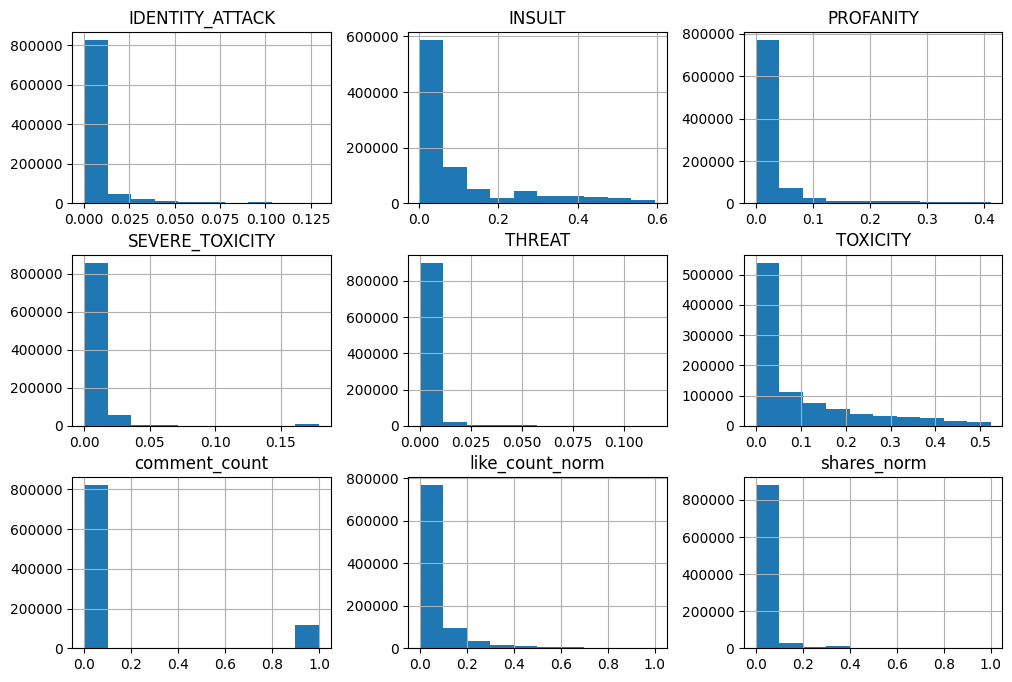

In [ ]:
import matplotlib.pyplot as plt

merged_clean_df.hist(bins=10, figsize=(12,8))
plt.show()

In [ ]:
transformed_data_log = np.log(merged_data_test[numerical_columns])

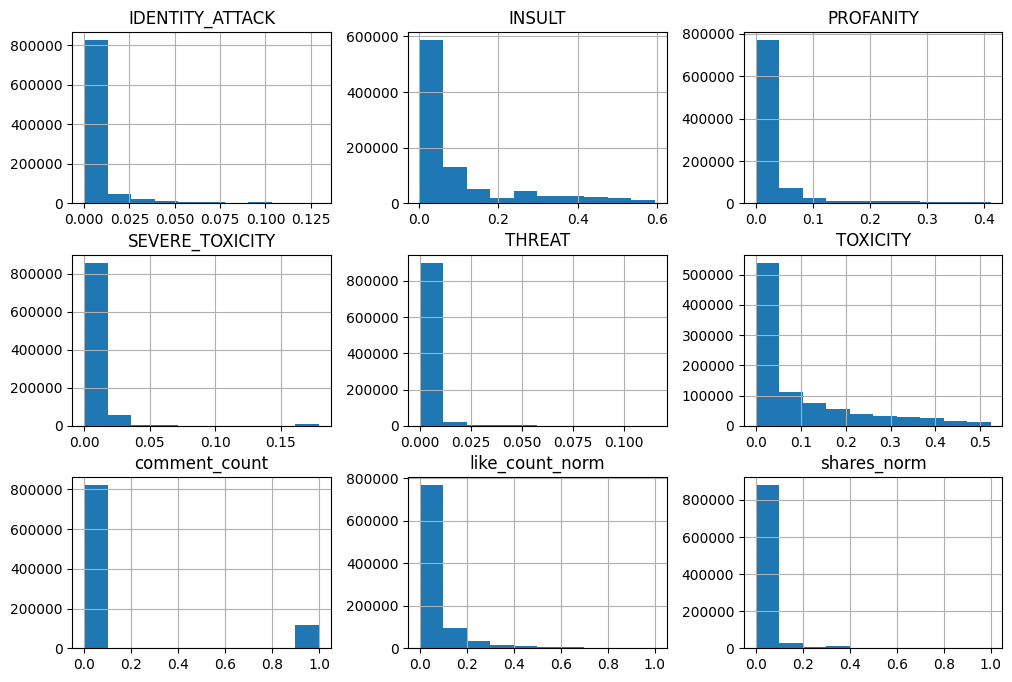

In [ ]:
import matplotlib.pyplot as plt

merged_clean_df.hist(bins=10, figsize=(12,8))
plt.show()

In [ ]:
# numerical_columns = merged_clean_df.select_dtypes(include=['number']).columns
# # Apply square root transformation
# transformed_data = np.sqrt(merged_clean_df[numerical_columns])

In [ ]:
# import matplotlib.pyplot as plt

# transformed_data.hist(bins=10, figsize=(12,8))
# plt.show()

### Nettoyage de mainTopic et secondTopic

In [48]:
merged_data_test = merged_clean_df


In [49]:
merged_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935698 entries, 0 to 935697
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   IDENTITY_ATTACK        935698 non-null  float64
 1   INSULT                 935698 non-null  float64
 2   PROFANITY              935698 non-null  float64
 3   SEVERE_TOXICITY        935698 non-null  float64
 4   THREAT                 935698 non-null  float64
 5   TOXICITY               935698 non-null  float64
 6   comment_count          935698 non-null  int64  
 7   created_time_comments  935698 non-null  object 
 8   like_count             935698 non-null  int64  
 9   message_comments       935698 non-null  object 
 10  created_time_posts     935698 non-null  object 
 11  mainTopic              927217 non-null  object 
 12  message_posts          925540 non-null  object 
 13  secondTopic            868622 non-null  object 
 14  shares                 935698 non-nu

In [50]:
merged_data_test['mainTopic']

0         composer-preview
1         composer-preview
2         composer-preview
3         composer-preview
4         composer-preview
                ...       
935693           actualite
935694           actualite
935695           actualite
935696           actualite
935697           actualite
Name: mainTopic, Length: 935698, dtype: object

In [51]:
import pandas as pd
import re


# Vérifiez les types des valeurs dans la colonne 'mainTopic'
print(merged_data_test['mainTopic'].apply(type).value_counts())

# Expression régulière pour détecter les motifs d'URL et de valeurs numériques de plus de 4 caractères
# pattern = re.compile(r'https?://\S+|\d{5,}')
# pattern = re.compile(r'https?://\S+|\d{5,}|\b\w{32}\b')
pattern = re.compile(r'https?://\S+|\d{5,}|\b\w{32}\b|\b\w{7}\b')

# Filtrer les index
filtered_indices = merged_data_test['mainTopic'].apply(lambda x: pattern.search(str(x)))

# Remplacer les valeurs correspondant au motif par une chaîne vide
merged_data_test.loc[filtered_indices[filtered_indices.notnull()].index, 'mainTopic'] = ''

# Réinitialiser les index
merged_data_test = merged_data_test.reset_index(drop=True)



mainTopic
<class 'str'>      927217
<class 'float'>      8481
Name: count, dtype: int64


In [52]:
merged_data_test['mainTopic']

0                  
1                  
2                  
3                  
4                  
            ...    
935693    actualite
935694    actualite
935695    actualite
935696    actualite
935697    actualite
Name: mainTopic, Length: 935698, dtype: object

In [53]:
merged_data_test['mainTopic'].dtype

dtype('O')

In [54]:
unique_main_topics = merged_data_test['mainTopic'].unique()
for topic in unique_main_topics:
    print(topic)


actualites
sports
vivre
affaires
opinions
arts
monde
chroniques
consommation
partenaires
nan
lesasdelinfo
jeunesse
2023
magazines
events
lesoleildequebec
2022
actualite
cinema
le-mag
auto
maison
zone
infolettre
covid-19
dossiers
programmation
2020
velo
retrospectives-de-la-decennie
toit-et-moi
hockey-junior
nos-recommandations
remparts
ma-region
infolettres
protegez-vous
cahiersspeciaux
jeuxdesprit.ca
articles
tokyo-2021
claude-villeneuve


In [55]:
 merged_data_test['mainTopic'].value_counts()

mainTopic
actualite                        343101
2022                             147892
actualites                        94162
                                  93482
2023                              72744
opinions                          50246
arts                              29922
affaires                          29686
le-mag                            22014
chroniques                        15153
sports                             9255
ma-region                          7929
maison                             4827
vivre                              2458
covid-19                            976
auto                                752
tokyo-2021                          612
monde                               394
consommation                        290
zone                                276
lesoleildequebec                    219
hockey-junior                       205
articles                            125
protegez-vous                        93
jeunesse                      

In [56]:
unique_second_topics = merged_data_test['secondTopic'].unique()
for topic in unique_second_topics:
    print(topic)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
nous-pouvons-apprendre-les-uns-des-autres-nous-enrichir-ensemble-fc86f5a23dbf3112a21c667df345f581?utm_source=dlvr.it&utm_medium=facebook
no-bra-la-poitrine-deconfinee-84321983822a881594973729f47c8502?utm_source=dlvr.it&utm_medium=facebook
changeons-la-fin-de-lhistoire-fc32d0c24a1bedec8b0479c9abeb25cb?utm_source=dlvr.it&utm_medium=facebook
apres-la-crise-qui-voudra-encore-etre-travailleur-autonome-0de32e2a50fd86298bb81eaeb61483c0?utm_source=dlvr.it&utm_medium=facebook
quoi-de-neuf-16b6b06510424df0f42ca2c05ce71081
retroviseur-antagonisant-2ab7c6a3df99b8fa7f1476e5613888e0?utm_source=dlvr.it&utm_medium=facebook
la-place-dyouville-vers-1915-449dbc0c027876db39e66dd6f122226d?utm_source=dlvr.it&utm_medium=facebook
le-coin-lecture-du-13-juin-2020-7a9b4c609bc3a4b765cc9ebdc281b6a7?utm_source=dlvr.it&utm_medium=facebook
un-ocean-de-saveurs-a-la-chasse-aux-algues-photos-e7d6d35e1d533ff938dcfad1b33c129e?utm_source=dlvr.it&

### BERTOPIC (PAS PLUS ESSAYER QUE CA)

In [ ]:
from bertopic import BERTopic

topic_model = BERTopic(embedding_model='all-MiniLM-L6-v2')

In [ ]:
texte_test = []

for i in range(10) :

    texte_test.append(merged_data_test['message_y'][i])

example = "Stalemate is a drawn position. It doesn't matter who has captured more pieces or is in a winning position"
topic, prob = topic_model.fit_transform(texte_test)



In [ ]:
topic_model.get_topic_info()

Topic  Count                Name  \
0     -1     10  -1_le_que_et_abord   

                                      Representation  \
0  [le, que, et, abord, soutenu, de, électoral, c...   

                                 Representative_Docs  
0  [HÉLÈNE BUZZETTI / Jagmeet Singh a soutenu que...

In [ ]:
topic_model.get_topic(0)

False

### TOP2VEC

In [ ]:
from top2vec import Top2Vec

In [ ]:
# Filtrer les lignes où 'mainTopic' est une chaîne vide
valeurs_vides_mainTopic = merged_data_test[merged_data_test['mainTopic'] == '']

# Sélectionner les valeurs de 'title' correspondantes et les convertir en liste de documents
valeurs_message_posts = valeurs_vides_mainTopic['message_posts'].tolist()

# Afficher les valeurs de 'message_posts' correspondantes
# print(valeurs_message_posts)

In [ ]:
# Obtenir les index des 50 premières lignes
indexes = valeurs_vides_mainTopic['message_posts'].index

# Afficher les index
print(indexes)

Int64Index([     0,      1,      2,      3,      4,      5,     14,     15,
                16,     17,
            ...
            933916, 933917, 933918, 933919, 933920, 933921, 933922, 933923,
            933924, 934426],
           dtype='int64', length=93482)


In [ ]:
# Obtenir le nombre de documents dans la liste valeurs_message_posts
nombre_documents = len(valeurs_message_posts)

# Afficher le nombre de documents
print("Nombre de documents dans valeurs_message_posts :", nombre_documents)

Nombre de documents dans valeurs_message_posts : 93482


In [ ]:
print(valeurs_message_posts[:10])

['HÉLÈNE BUZZETTI / Jagmeet Singh a soutenu que ce n’était pas le moment d’aller en élection parce que notre système électoral est malmené et qu’il faut d’abord le fortifier.', 'HÉLÈNE BUZZETTI / Jagmeet Singh a soutenu que ce n’était pas le moment d’aller en élection parce que notre système électoral est malmené et qu’il faut d’abord le fortifier.', 'HÉLÈNE BUZZETTI / Jagmeet Singh a soutenu que ce n’était pas le moment d’aller en élection parce que notre système électoral est malmené et qu’il faut d’abord le fortifier.', 'HÉLÈNE BUZZETTI / Jagmeet Singh a soutenu que ce n’était pas le moment d’aller en élection parce que notre système électoral est malmené et qu’il faut d’abord le fortifier.', 'HÉLÈNE BUZZETTI / Jagmeet Singh a soutenu que ce n’était pas le moment d’aller en élection parce que notre système électoral est malmené et qu’il faut d’abord le fortifier.', 'HÉLÈNE BUZZETTI / Jagmeet Singh a soutenu que ce n’était pas le moment d’aller en élection parce que notre système éle

In [ ]:
print(type(valeurs_message_posts[0]))

<class 'str'>


In [ ]:
# Pour faire en sorte que ce soit une liste de string
if not isinstance(valeurs_message_posts, list):
    valeurs_message_posts = [str(valeurs_message_posts)]
else:
    valeurs_message_posts = [str(item) for item in valeurs_message_posts]

In [ ]:
# Créer un modèle Top2Vec
# min_count = 20
model = Top2Vec(documents=valeurs_message_posts, speed='learn', workers=8)


2024-04-03 12:02:36,285 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2024-04-03 12:02:45,464 - top2vec - INFO - Downloading universal-sentence-encoder-multilingual model
INFO:top2vec:Downloading universal-sentence-encoder-multilingual model
2024-04-03 12:02:47,442 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-04-03 12:03:19,470 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-04-03 12:05:27,348 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-04-03 12:05:31,187 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [ ]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [ ]:
print(topic_sizes)

[4564 2037 1749 1474 1275 1181 1072 1067  991  983  965  897  890  840
  839  804  763  697  645  621  616  577  576  547  534  534  520  506
  497  495  490  488  484  472  461  426  425  420  409  407  407  383
  380  379  369  358  357  344  340  340  326  324  322  320  316  309
  308  307  304  300  299  295  293  291  289  285  277  275  274  273
  270  265  262  262  257  250  249  246  242  242  241  240  240  236
  235  235  232  232  229  222  220  218  217  216  215  214  213  213
  210  209  208  206  204  204  202  200  198  195  192  186  186  181
  177  176  176  173  170  169  167  166  159  158  158  158  157  157
  156  155  153  150  150  148  147  147  146  145  144  144  141  141
  140  139  139  139  138  138  137  136  136  135  135  135  135  134
  133  132  132  131  131  130  130  130  130  129  129  127  125  122
  122  121  120  119  119  119  119  119  118  118  116  116  115  115
  114  114  113  112  112  111  111  111  111  111  109  108  108  108
  107 

In [ ]:
print(topic_nums)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [ ]:
topic_words, word_scores, topic_nums = model.get_topics(5)

In [ ]:
for w, s , n in zip(topic_words, word_scores, topic_nums):
  print(n)
  print(f"Words and score: {w,s}")

0
Words and score: (array(['chasseur', 'lynx', 'bobcat', 'quebecois', 'hunter', 'chasser',
       'felin', 'quebecoise', 'quebec', 'rare', 'fugace', 'wilderness',
       'lupin', 'acharne', 'majestueux', 'fourrure', 'encounter', 'connu',
       'catherine', 'lacasse', 'canadien', 'canada', 'exceptionnelle',
       'lemieux', 'encontre', 'lebourgneuf', 'convaincu', 'canadiennes',
       'inhabituel', 'montreal', 'chance', 'bobinette', 'canadienne',
       'xig', 'longue', 'loin', 'vu', 'surpris', 'cavabienaller',
       'comportementale', 'attendu', 'special', 'veaux', 'charlesbourg',
       'probable', 'gosselin', 'exister', 'regionaliste', 'surprend',
       'poux'], dtype='<U15'), array([0.32349122, 0.30500776, 0.26532185, 0.26082516, 0.25567058,
       0.2507545 , 0.22585092, 0.2105248 , 0.20221081, 0.19631469,
       0.18515512, 0.1763439 , 0.17446697, 0.16691247, 0.16576104,
       0.16494362, 0.16406976, 0.16097894, 0.15725443, 0.15692501,
       0.1564144 , 0.1559152 , 0.1551275

In [ ]:
doc, doc_scores, doc_ids = model.search_documents_by_topic(topic_num=1,num_docs=10)
for doc, score, doc_id in zip(doc, doc_scores, doc_ids ):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 92509, Score: 0.9902660846710205
-----------
Le coup de crayon d'André-Philippe Côté✏️
-----------

Document: 76226, Score: 0.990265965461731
-----------
Le coup de crayon d'André-Philippe Côté✏️
-----------

Document: 76227, Score: 0.990265965461731
-----------
Le coup de crayon d'André-Philippe Côté✏️
-----------

Document: 65715, Score: 0.990265965461731
-----------
Le coup de crayon d'André-Philippe Côté✏️
-----------

Document: 65714, Score: 0.990265965461731
-----------
Le coup de crayon d'André-Philippe Côté✏️
-----------

Document: 76235, Score: 0.990265965461731
-----------
Le coup de crayon d'André-Philippe Côté✏️
-----------

Document: 79185, Score: 0.990265965461731
-----------
Le coup de crayon d'André-Philippe Côté✏️
-----------

Document: 65548, Score: 0.990265965461731
-----------
Le coup de crayon d'André-Philippe Côté✏️
-----------

Document: 65546, Score: 0.990265965461731
-----------
Le coup de crayon d'André-Philippe Côté✏️
-----------

Document: 76240, S

In [ ]:
valeurs_vides_mainTopic['mainTopic']

0          
1          
2          
3          
4          
         ..
933921     
933922     
933923     
933924     
934426     
Name: mainTopic, Length: 93482, dtype: object

In [ ]:
topic_list = []
topic_list_full = []
num_topics = model.get_num_topics() #3
topic_words, word_scores, topic_nums = model.get_topics(num_topics)

for t,t_size,w in zip(topic_nums,topic_sizes,topic_words) :
    doc, doc_scores, doc_ids = model.search_documents_by_topic(topic_num=t,num_docs=t_size)
    for i in doc_ids :
      topic_list_full.append(((w[0],i)))



# for w, s, n in zip(topic_words, word_scores, topic_nums):
#     topic_list.append((w[0],topic_nums))
#     print(s)
#     print(w)
#     print(n)

topic_list_full_triee = sorted(topic_list_full, key=lambda x: x[1])

In [ ]:
list_sujet = []

for sujet,idx in topic_list_full_triee :
    list_sujet.append(sujet)

list_intermediaire =[]
for doc,sujet in zip(valeurs_message_posts,list_sujet) :
  list_intermediaire.append((doc,sujet))



In [ ]:
list_intermediaire

In [ ]:
# Index pour parcourir la liste list_intermediaire
index = 0

# Parcours des lignes du dataframe
for i, row in merged_data_test.iterrows():
    # Si la valeur de mainTopic est vide
    if row['mainTopic'] == '':
        # Remplacer la valeur par celle du tuple correspondant dans list_intermediaire
        if index < len(list_intermediaire):
            merged_data_test.at[i, 'mainTopic'] = list_intermediaire[index][1]  # Remplacer avec le sujet du tuple
            index += 1  # Passer au tuple suivant dans list_intermediaire

# Vérifier si tous les sujets ont été utilisés
if index != len(list_intermediaire):
    print("Attention : Tous les sujets de list_intermediaire n'ont pas été utilisés pour remplir les valeurs vides de mainTopic.")

In [ ]:
print(merged_data_test[merged_data_test['mainTopic'] == ''].index)

Int64Index([], dtype='int64')


In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df_subset = merged_data_test.loc[:, ['mainTopic', 'message_posts']]

# Afficher le nouveau DataFrame
df_subset.head(50)

mainTopic                                      message_posts
0     election  HÉLÈNE BUZZETTI / Jagmeet Singh a soutenu que ...
1     election  HÉLÈNE BUZZETTI / Jagmeet Singh a soutenu que ...
2     election  HÉLÈNE BUZZETTI / Jagmeet Singh a soutenu que ...
3     election  HÉLÈNE BUZZETTI / Jagmeet Singh a soutenu que ...
4     election  HÉLÈNE BUZZETTI / Jagmeet Singh a soutenu que ...
5     election  HÉLÈNE BUZZETTI / Jagmeet Singh a soutenu que ...
6   actualites  Poussière et marteaux-piqueurs accompagnent l'...
7   actualites  Poussière et marteaux-piqueurs accompagnent l'...
8   actualites  Poussière et marteaux-piqueurs accompagnent l'...
9   actualites  La ministre québécoise du Tourisme, Caroline P...
10  actualites  La ministre québécoise du Tourisme, Caroline P...
11  actualites  La ministre québécoise du Tourisme, Caroline P...
12  actualites  La ministre québécoise du Tourisme, Caroline P...
13  actualites  La ministre québécoise du Tourisme, Caroline P...
14   normandin  JEAN-SIMON GAGNÉ / Un spectre hante les côtes ...
15    labeaume  PAULE VERMOT-DESROCHES / À 97 ans, Irène Beaud...
16    labeaume  PAULE VERMOT-DESROCHES / À 97 ans, Irène Beaud...
17    labeaume  PAULE VERMOT-DESROCHES / À 97 ans, Irène Beaud...
18  actualites  La réaction des policiers ce matin-là était «e...
19      saison  « La moitié de l’équipe ne sera pas de retour ...
20      saison  « La moitié de l’équipe ne sera pas de retour ...
21      quebec  Pas de facture d’Hydro-Québec à la fin du mois...
22      quebec  Pas de facture d’Hydro-Québec à la fin du mois...
23      quebec  JEAN-MARC SALVET / Il est absurde que les test...
24    annonces  Pilules amaigrissantes, crèmes antirides mirac...
25    annonces  Pilules amaigrissantes, crèmes antirides mirac...
26    rivieres  VÉRIFICATION FAITE / Le sébaste est montré du ...
27    philippe         Le coup de crayon d'André-Philippe Côté ✏️
28      sports  « C’est frustrant et fâchant de finir comme ça...
29  actualites  La Ville de Québec cherche à remédier aux enje...
30  actualites  Le compte à rebours est amorcé pour les jeunes...
31  actualites  Le compte à rebours est amorcé pour les jeunes...
32  actualites  Le compte à rebours est amorcé pour les jeunes...
33  actualites  Le compte à rebours est amorcé pour les jeunes...
34  actualites  Le compte à rebours est amorcé pour les jeunes...
35  actualites  Le compte à rebours est amorcé pour les jeunes...
36  actualites  Le compte à rebours est amorcé pour les jeunes...
37  actualites  Le compte à rebours est amorcé pour les jeunes...
38  actualites  Le compte à rebours est amorcé pour les jeunes...
39  actualites  Le compte à rebours est amorcé pour les jeunes...
40  actualites  Le compte à rebours est amorcé pour les jeunes...
41  actualites  Le compte à rebours est amorcé pour les jeunes...
42  actualites  Le compte à rebours est amorcé pour les jeunes...
43  actualites  Le compte à rebours est amorcé pour les jeunes...
44  actualites  Le compte à rebours est amorcé pour les jeunes...
45  actualites  Le compte à rebours est amorcé pour les jeunes...
46  actualites  Le compte à rebours est amorcé pour les jeunes...
47  actualites  Le compte à rebours est amorcé pour les jeunes...
48  actualites  Le compte à rebours est amorcé pour les jeunes...
49  actualites  Le compte à rebours est amorcé pour les jeunes...

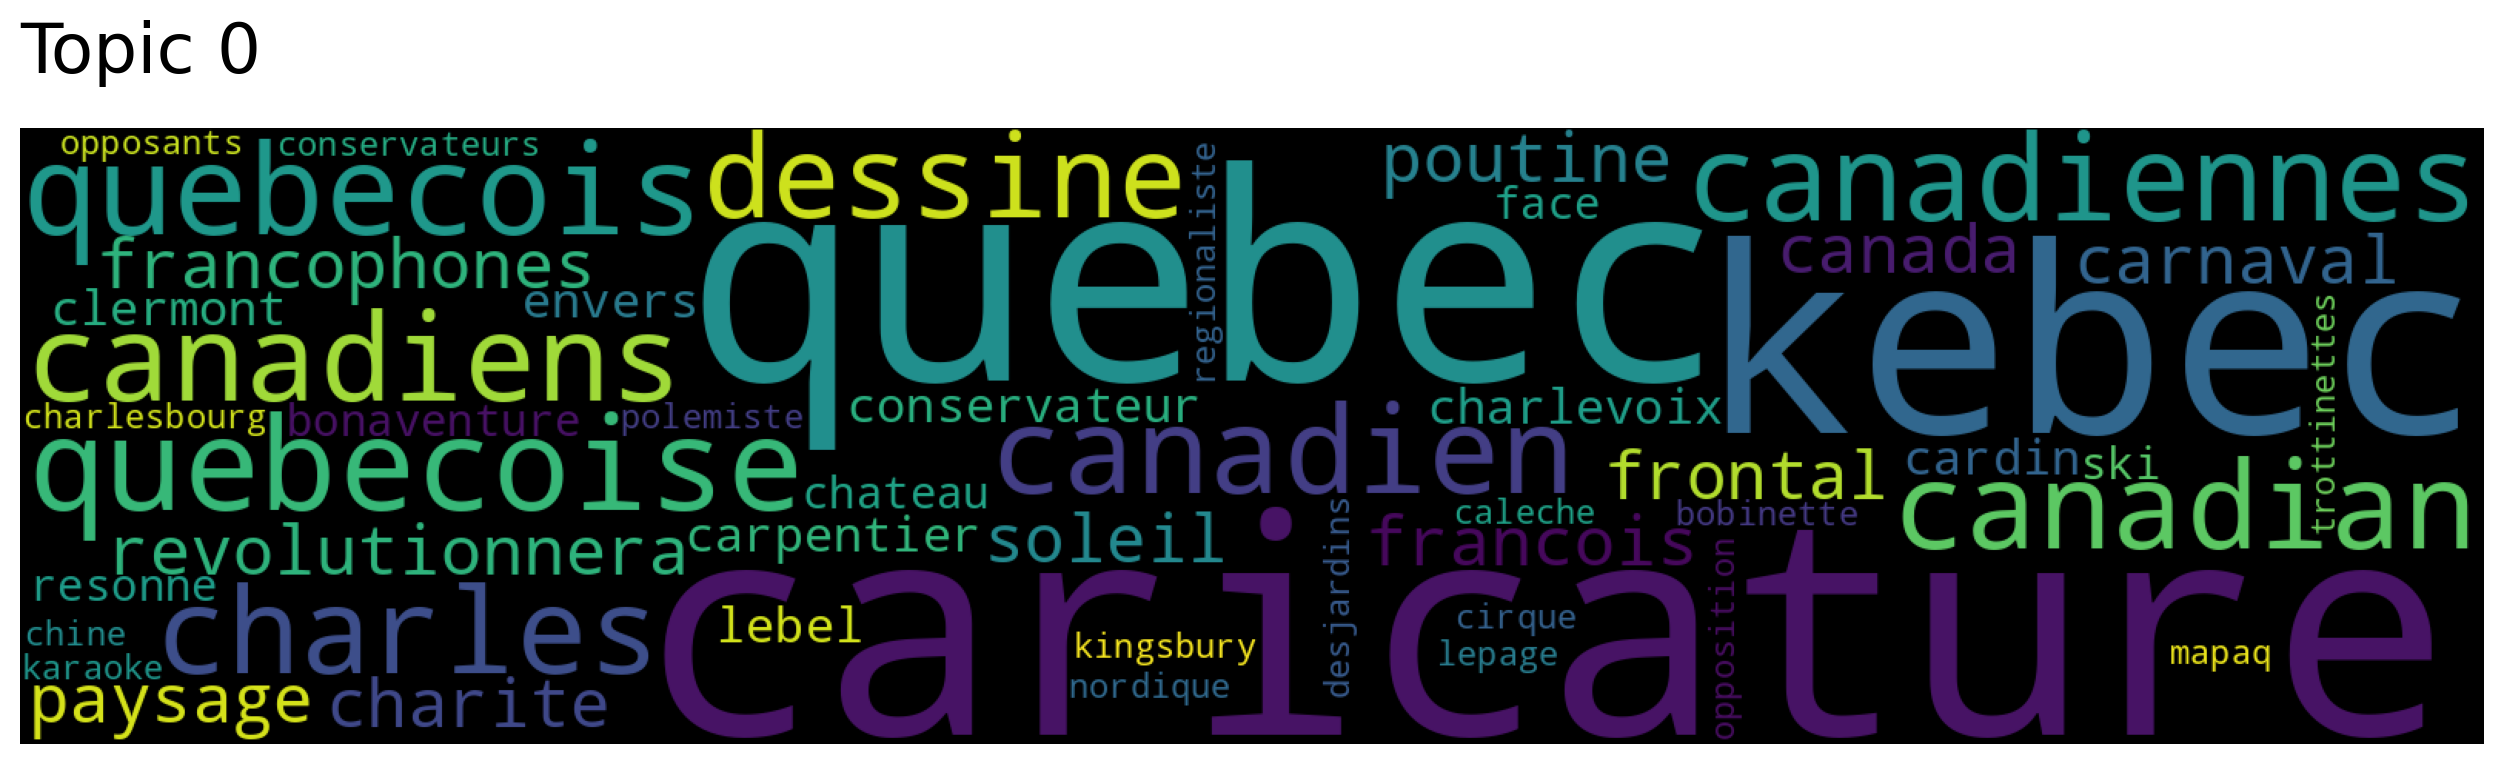

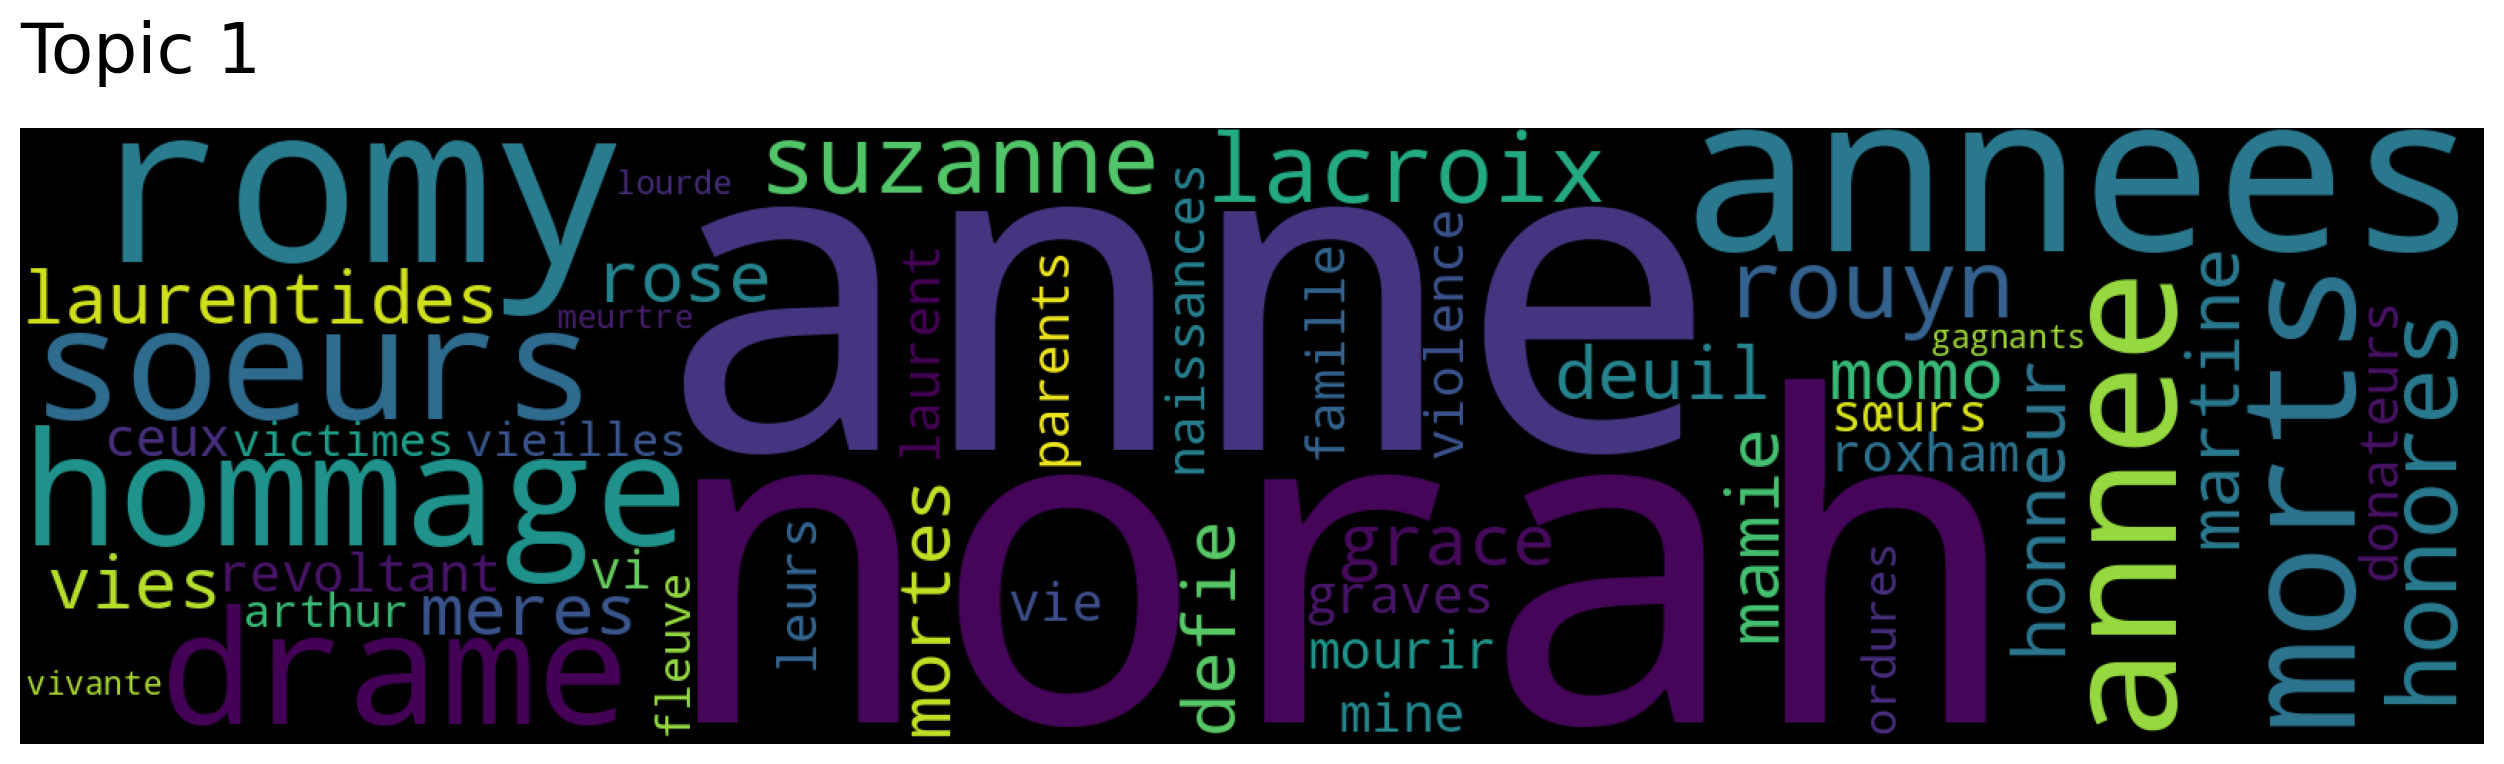

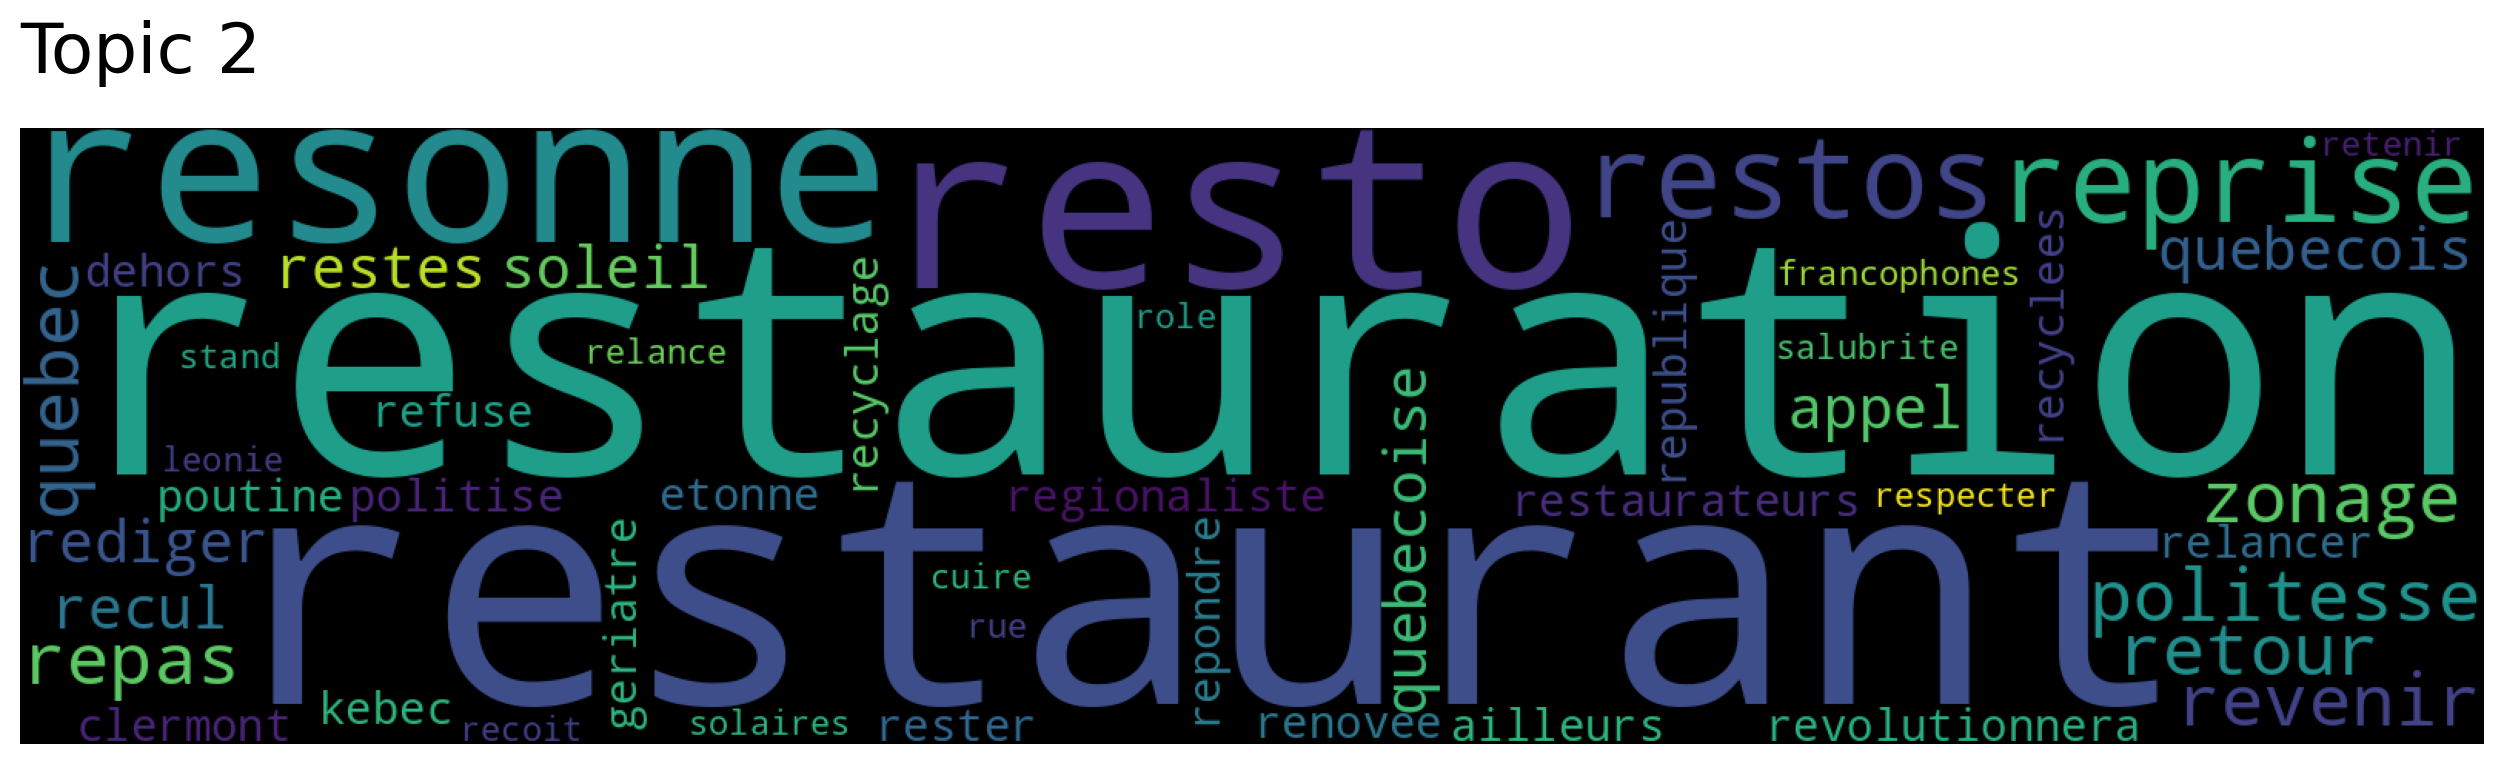

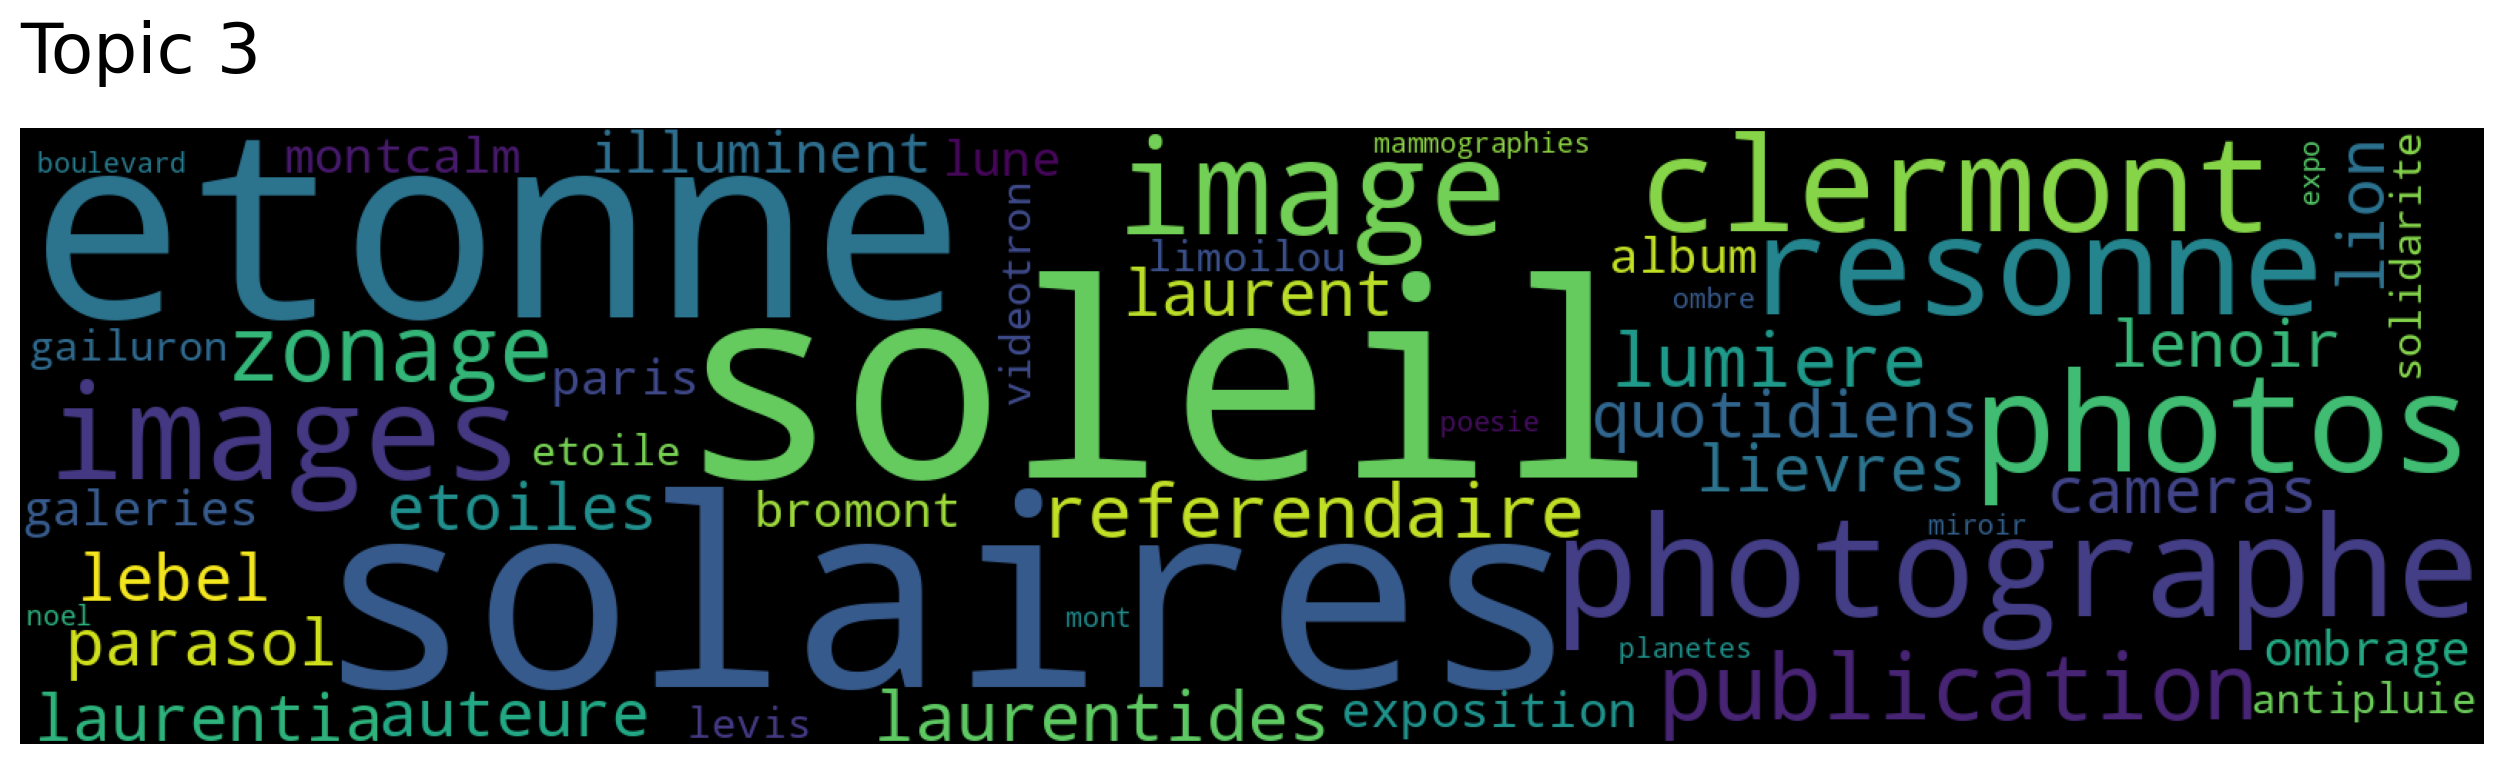

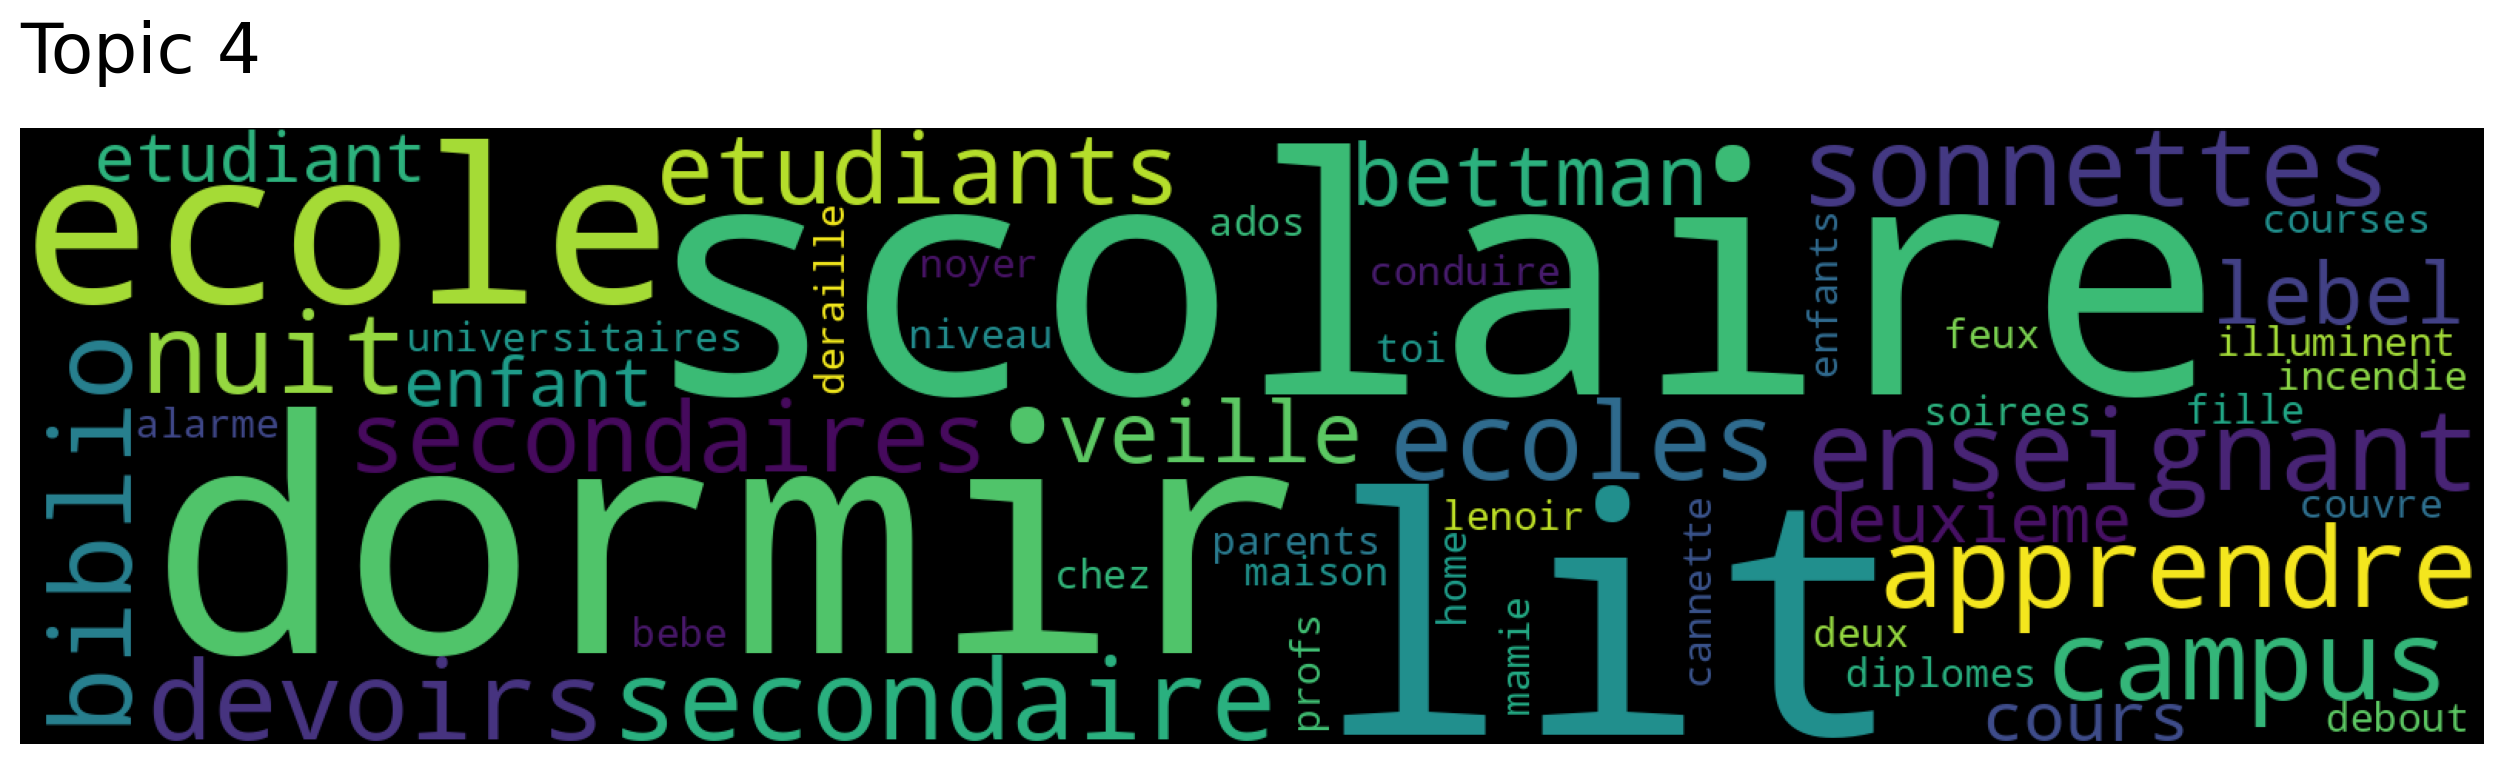

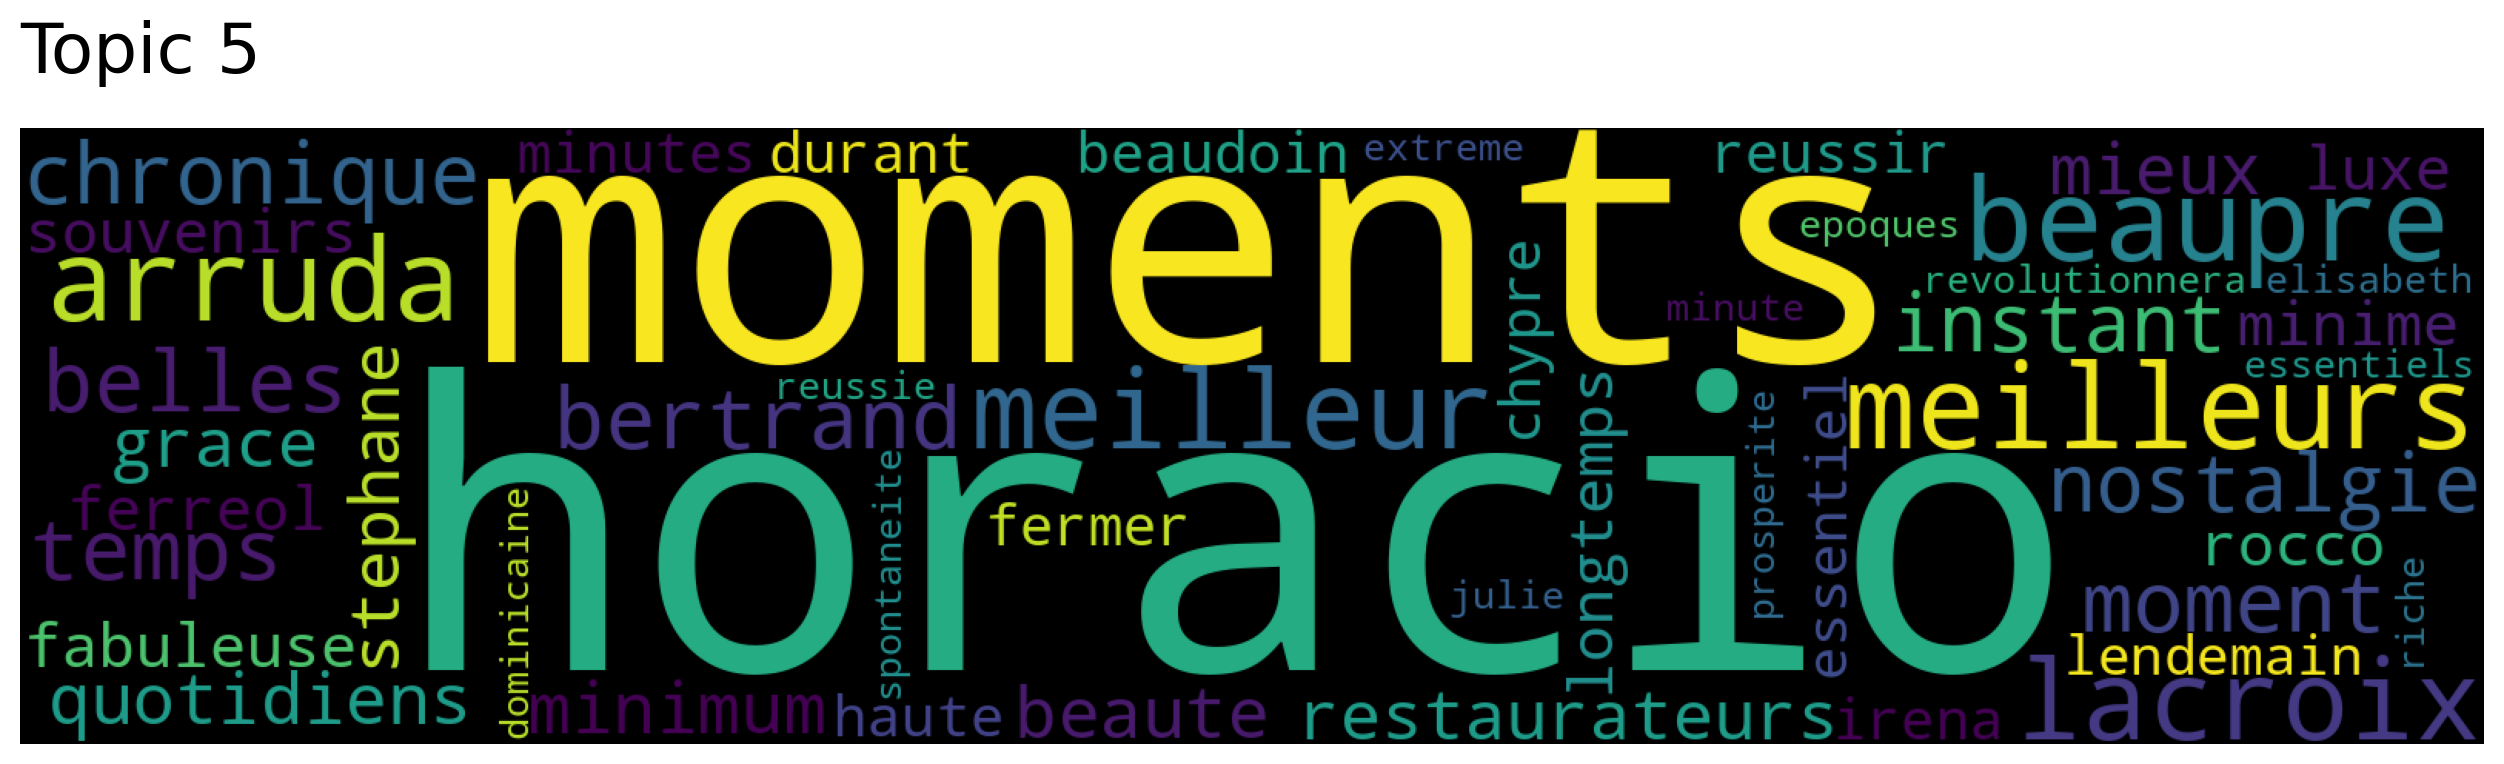

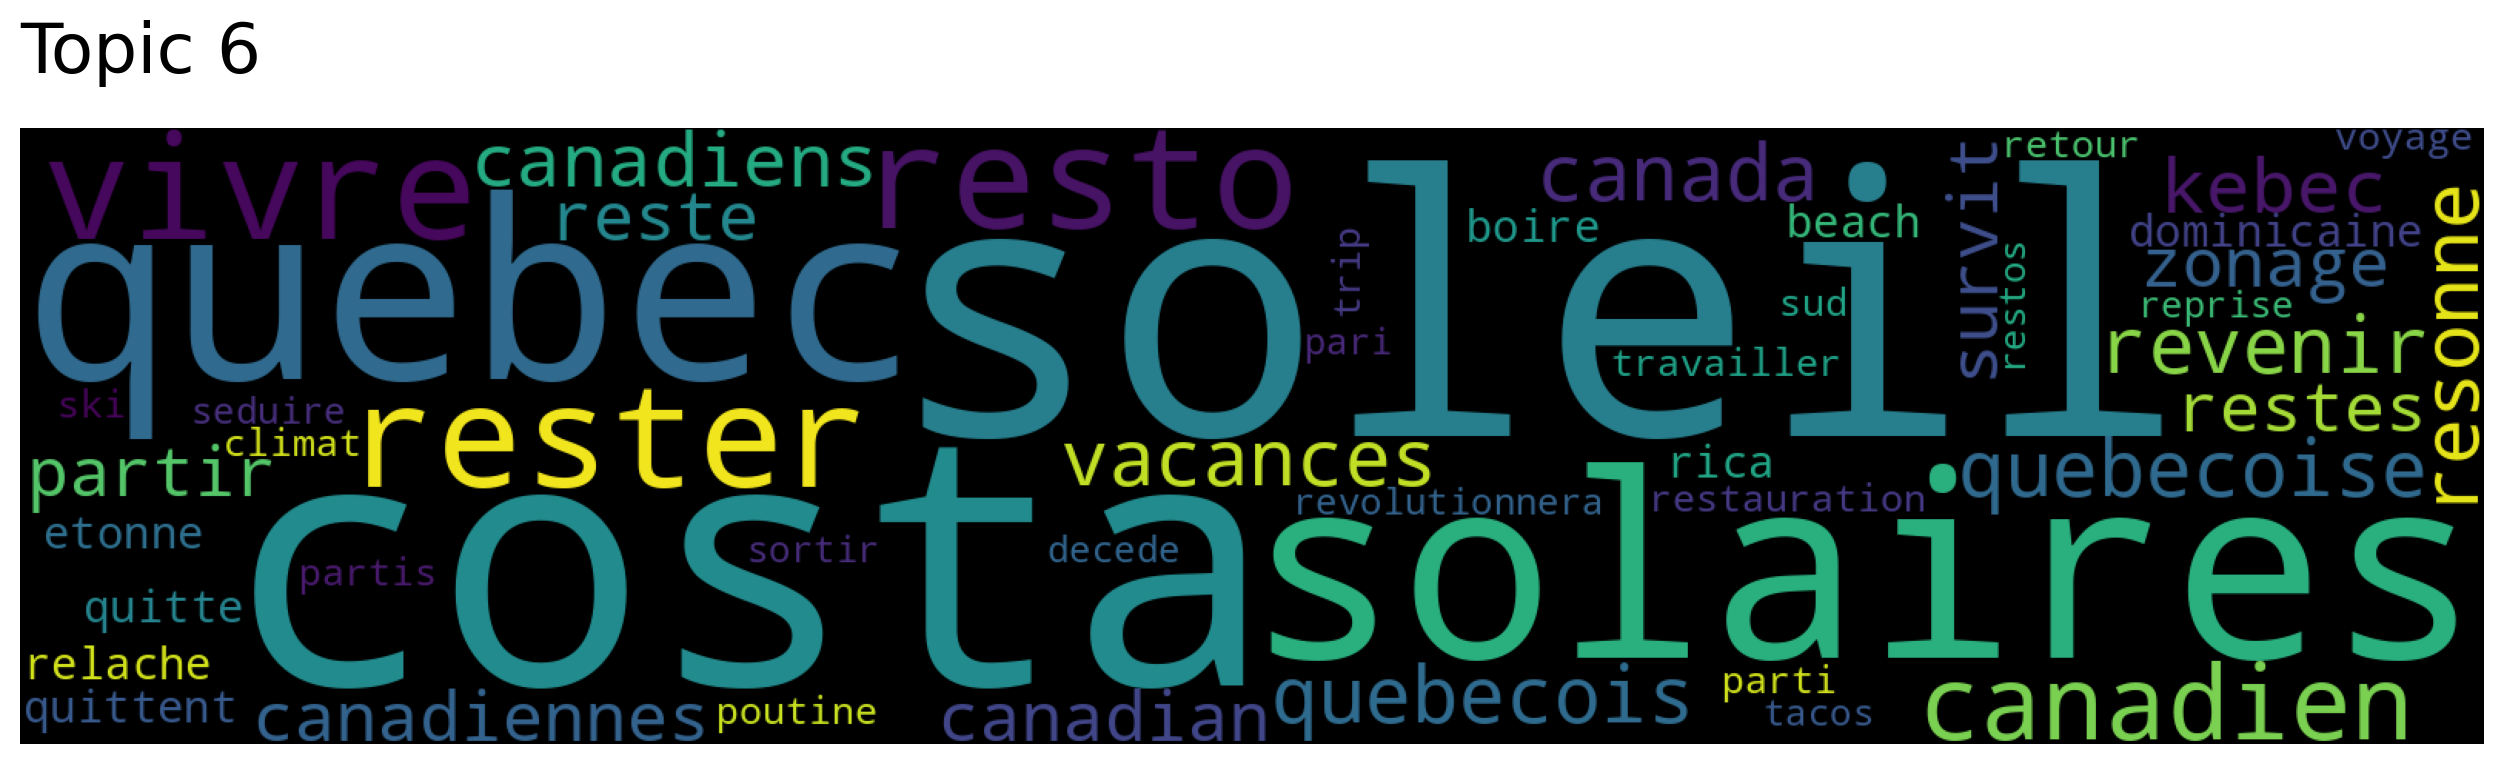

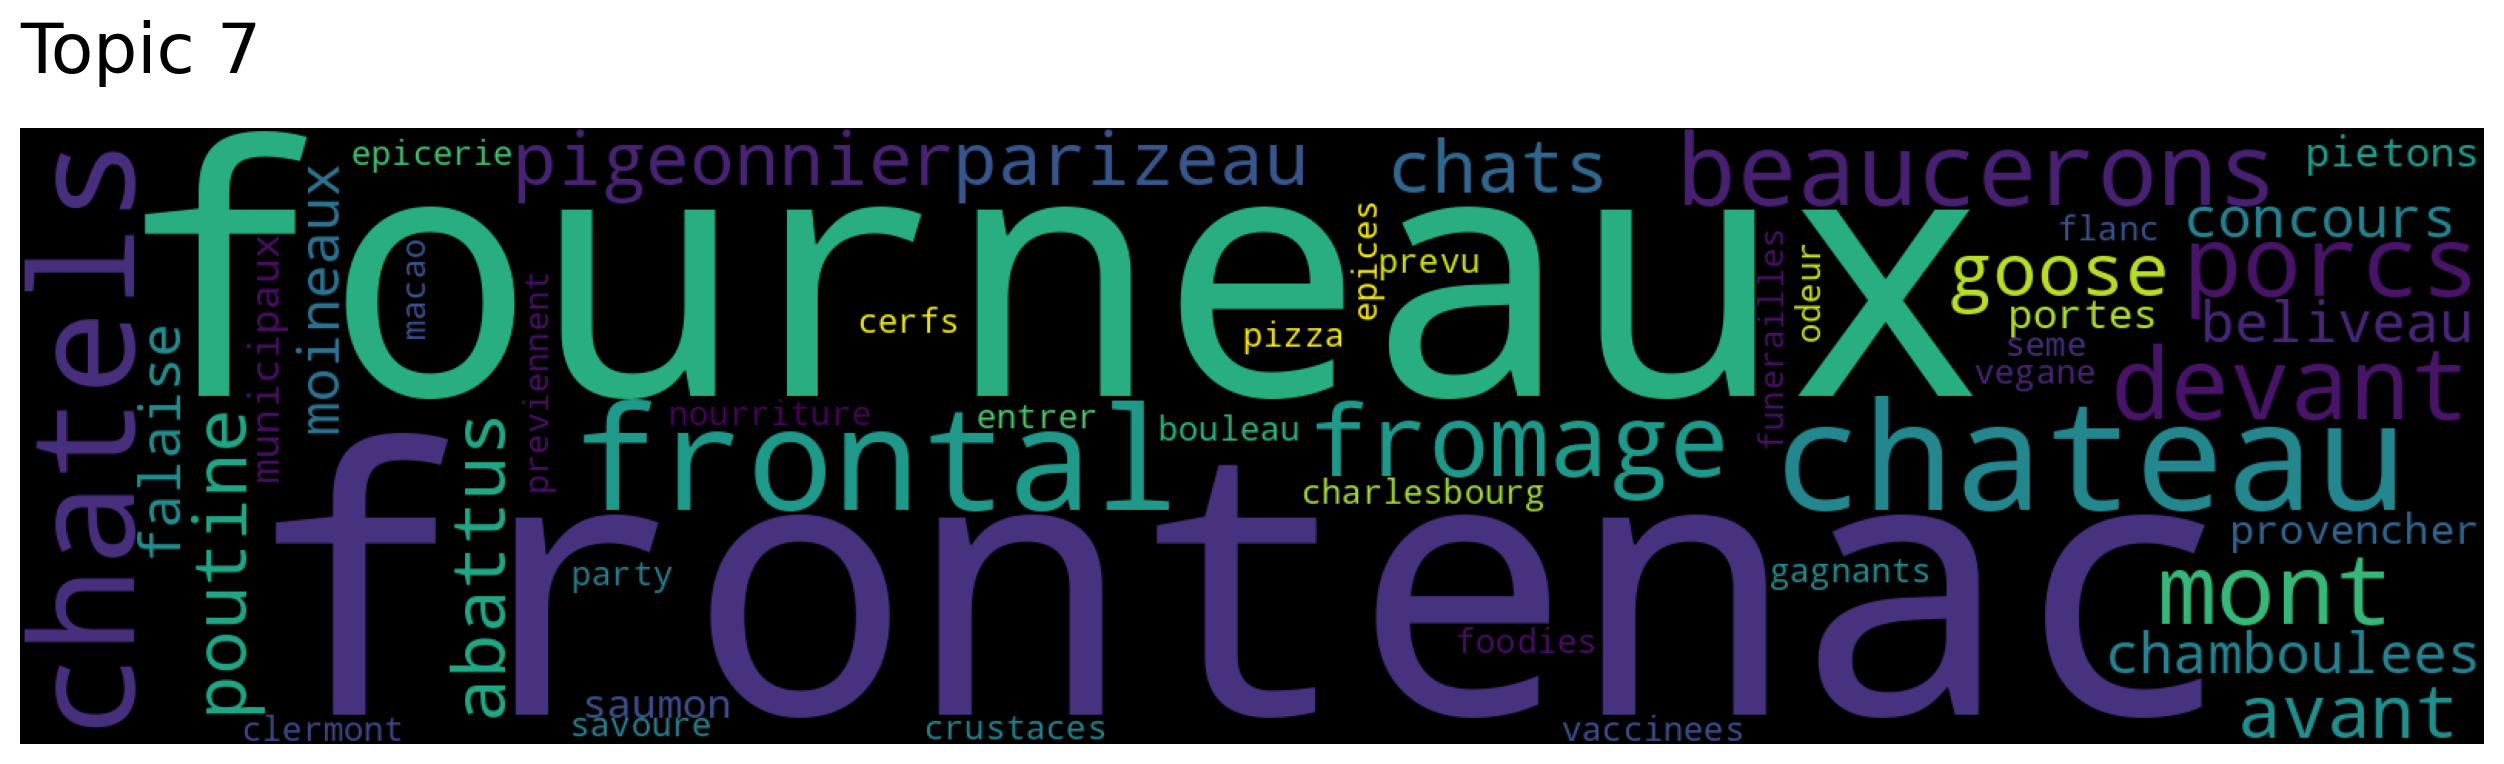

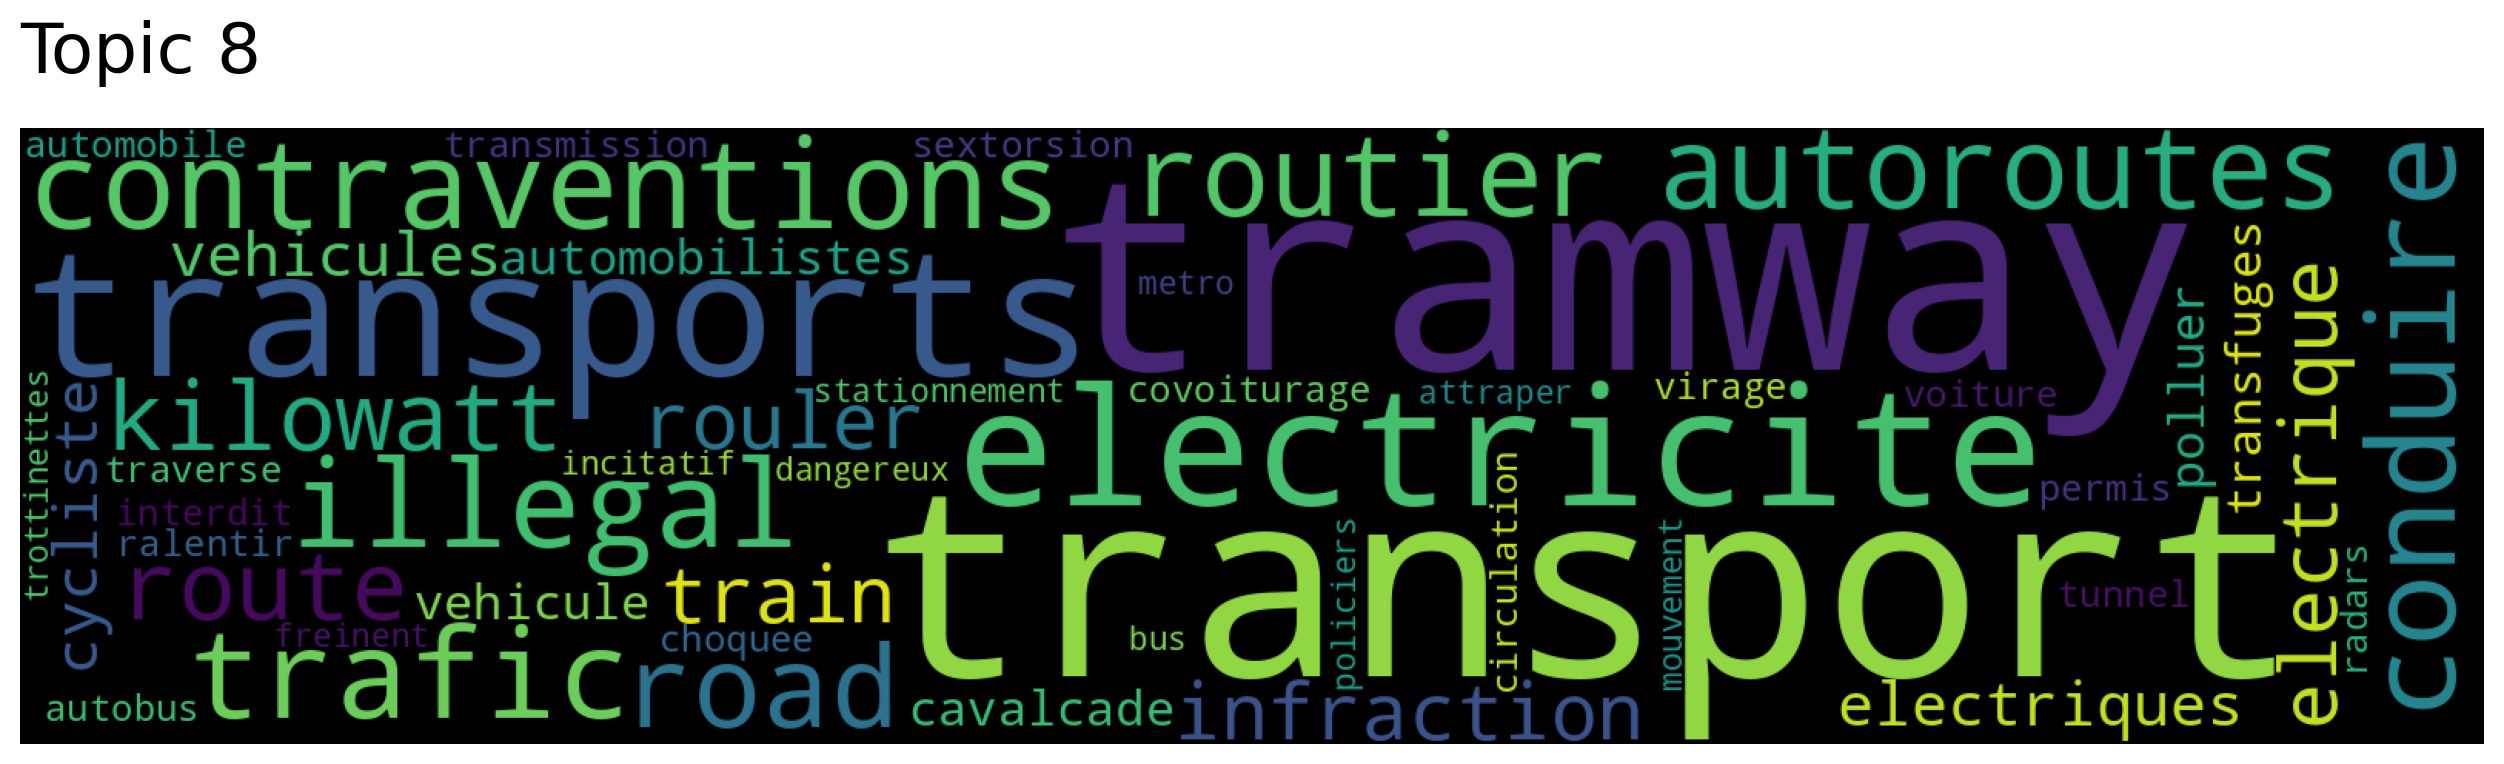

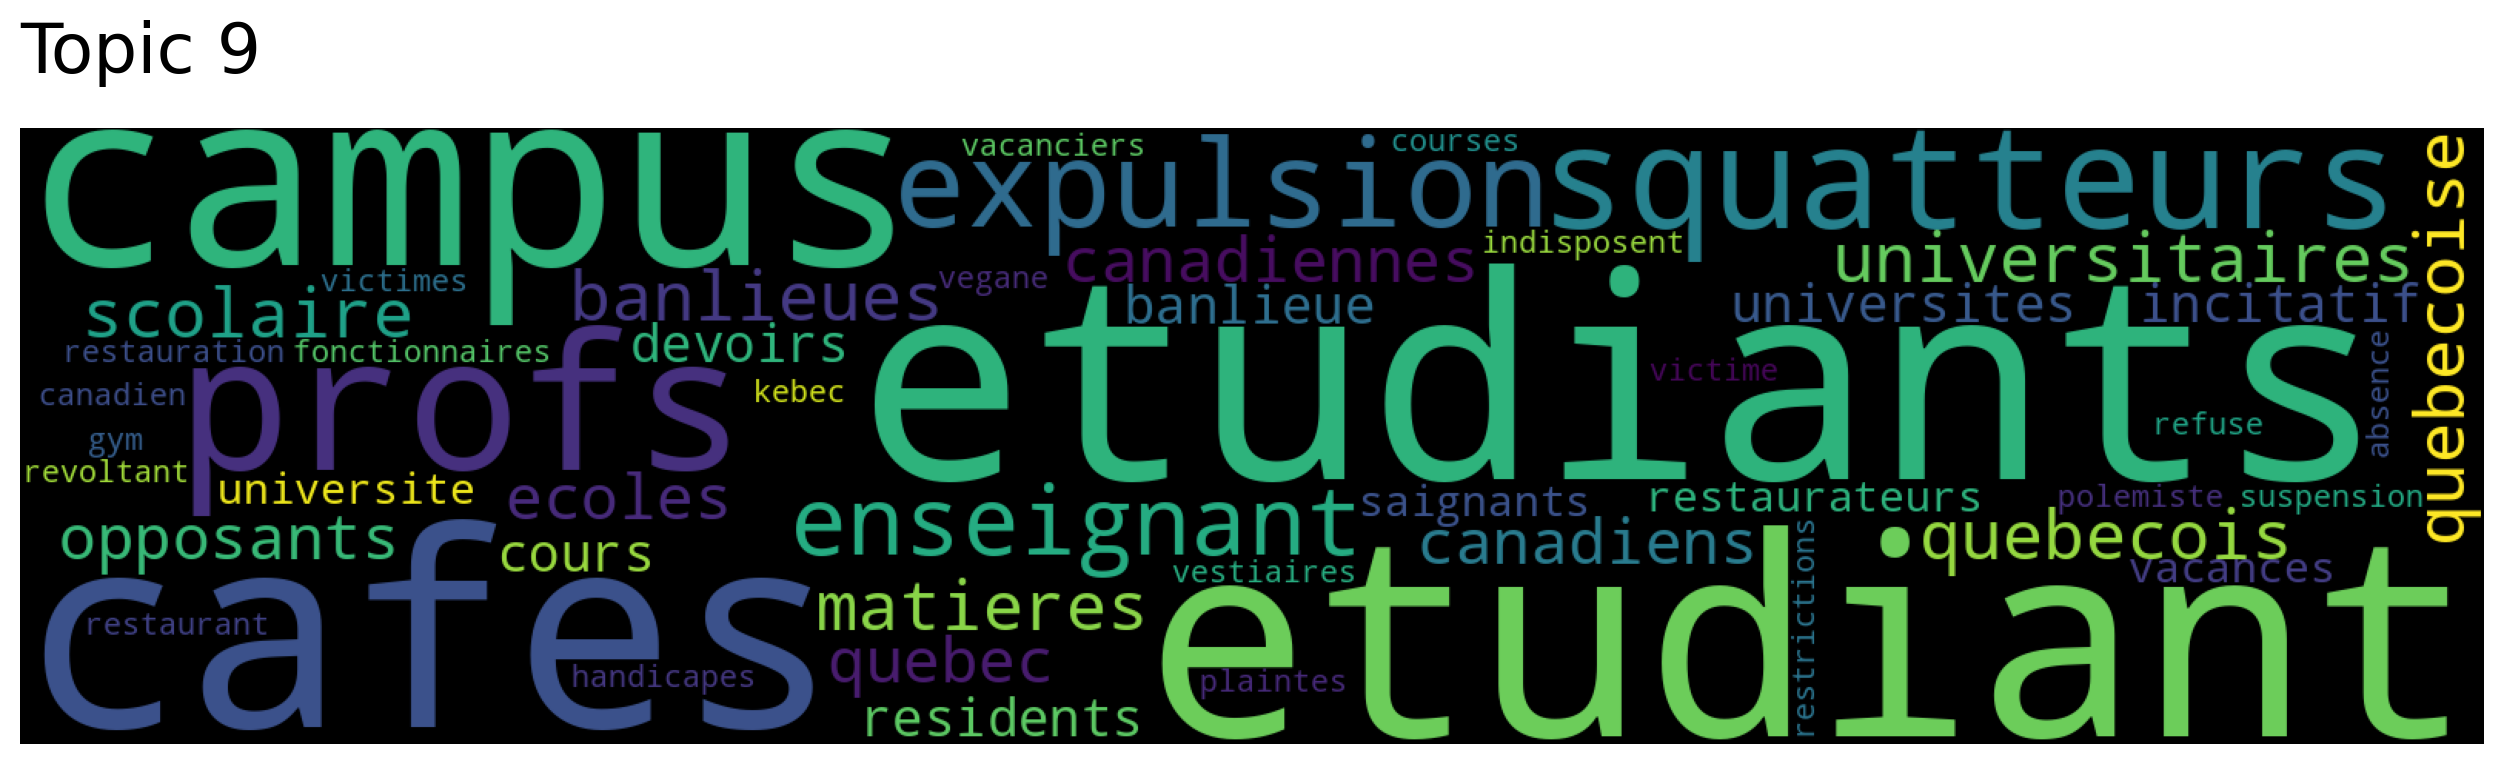

In [ ]:
model.get_num_topics() #3
topic_words, word_scores, topic_nums = model.get_topics(10)

for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

### SENTIMENT ANALYSIS

In [ ]:
from transformers import pipeline
from transformers import AutoTokenizer

In [ ]:
# Instancier le tokenizer avec la longueur maximale spécifiée
max_sequence_length = 1024  # Par exemple
tokenizer = AutoTokenizer.from_pretrained("lxyuan/distilbert-base-multilingual-cased-sentiments-student", padding='max_length',max_length=512,truncation=True)
# model=model_path, tokenizer=model_path, max_length=512, truncation=True
tokenizer.model_max_length = 512
# Créer le pipeline en utilisant le tokenizer instancié
distilled_student_sentiment_classifier = pipeline(
    model="lxyuan/distilbert-base-multilingual-cased-sentiments-student",
    tokenizer=tokenizer,
    max_length=512,
    padding='max_length',
    truncation=True
)

In [ ]:
tokenizer.model_max_length

512

In [ ]:
only_comments = merged_data_test['message_comments'].head(50).tolist()

In [ ]:
# texte_test_sentiment = []

# for i in range(20) :

#     random_index = random.randint(0, len(merged_data_test['message_x']) - 1)
#     texte_test_sentiment.append(merged_data_test['message_x'][random_index])

In [ ]:
sentiment_score = []

for i in only_comments:

  score = distilled_student_sentiment_classifier(i)
  sentiment_score.append((i, score))

In [ ]:
sentiment_score

In [ ]:
# code pour ajouter les colonnes neutre,positive et negative
df = pd.DataFrame(sentiment_score, columns=['text', 'sentiment'])

# Ajouter les colonnes 'positive', 'neutre' et 'négative' remplies en utilisant apply
merged_data_test['positive'] = df['sentiment'].apply(lambda x: 1 if x[0]['label'] == 'positive' else 0)
merged_data_test['neutre'] = df['sentiment'].apply(lambda x: 1 if x[0]['label'] == 'neutral' else 0)
merged_data_test['negative'] = df['sentiment'].apply(lambda x: 1 if x[0]['label'] == 'negative' else 0)

In [ ]:
merged_data_test.head(50)

In [ ]:
# main_topic_frequencies = merged_df['mainTopic'].value_counts()
# for topic, frequency in main_topic_frequencies.items():
#     print(f"Topic: {topic} | Frequency: {frequency}")


In [ ]:
# main_topic_frequencies = merged_df['parent'].value_counts()
# for topic, frequency in main_topic_frequencies.items():
#     print(f"Id parent: {topic} | Frequency: {frequency}")

### NER-EXTRACTION


In [95]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

# Charger le tokenizer et le modèle CamemBERT-NER
tokenizer = AutoTokenizer.from_pretrained("Jean-Baptiste/camembert-ner")
model = AutoModelForTokenClassification.from_pretrained("Jean-Baptiste/camembert-ner")

In [102]:


# Définir la fonction pour extraire les entités nommées d'un texte
def extraire_ner(texte):
    # Traiter le texte et extraire les entités nommées
    resultats_ner = nlp(texte)

    # Initialiser une liste pour stocker les entités de type 'PER'
    entites_PER = []

    # Filtrer les entités de type 'PER' (personnes) et les ajouter à la liste
    for phrase in resultats_ner:
        if phrase['entity_group'] == 'PER':
            entites_PER.append(phrase['word'])

    return entites_PER

# Initialiser le pipeline NER avec le tokenizer et le modèle
nlp = pipeline('ner', model=model, tokenizer=tokenizer, aggregation_strategy="simple")

# Sélectionner les 50 premiers textes de la colonne 'message_comments'
textes = merged_data_test['message_comments'].head(50)

# Appliquer la fonction extraire_ner à chaque texte
entites_ner = [extraire_ner(texte) for texte in textes]

# Créer un DataFrame pour stocker les entités nommées extraites
resultats = pd.DataFrame({'ner_PER': entites_ner})

# Afficher les entités nommées de type 'PER' extraites pour les 50 premiers textes
print(resultats)

# Compter le nombre d'occurrences de tous les NER PER dans l'ensemble des textes
ner_PER_total = [item for sublist in entites_ner for item in sublist]
occurrences_ner_PER = pd.Series(ner_PER_total).value_counts()

# Supprimer la colonne 'message_comments' du DataFrame resultats
# resultats_sans_texte = resultats.drop(columns=['message_comments'])

# Afficher les occurrences de chaque NER PER
print("\nOccurrences de chaque NER PER:")
print(occurrences_ner_PER)


                                     ner_PER
0                                         []
1                                         []
2                  [Denise Morais, McKinsey]
3                                         []
4                                         []
5                                         []
6                                         []
7                                         []
8                                         []
9   [Legault, Louis-Jean Cormier, Elon Musk]
10                                 [Legault]
11                                        []
12                                        []
13                                 [Legault]
14                                        []
15                                        []
16                                [Leo Cote]
17                               [Guillaume]
18                                        []
19                                        []
20                                        []
21        

### CLASSIFICATION D'UN LEXIQUE DE SUJETS

In [ ]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli")

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
sequence_to_classify = merged_data_test['message_posts'].head(50).tolist()
candidate_labels = ['actualites','sports','affaires','opinions','arts','monde','consommation','jeunesse','actualite','cinema','auto','maison','covid-19','dossiers','velo','hockey-junior','protegez-vous']
list_classifier = classifier(sequence_to_classify, candidate_labels)

In [ ]:
list_classifier

### Longueur des commentaires

In [92]:

# Calculer la longueur de chaque commentaire
merged_data_test['comment_length'] = merged_data_test['message_comments'].apply(lambda x: len(str(x).split()))

# Afficher les statistiques des longueurs des commentaires
comment_length_stats = merged_data_test['comment_length'].describe()
print("Statistiques des longueurs des commentaires :\n", comment_length_stats)

Statistiques des longueurs des commentaires :
 count    935698.000000
mean         22.211841
std          35.528357
min           1.000000
25%           6.000000
50%          13.000000
75%          26.000000
max        1287.000000
Name: comment_length, dtype: float64


### RANDOM FOREST


In [ ]:
data_test = merged_clean_df

In [ ]:
# Attributs non essentiel
null_attributs = ['id_posts','id_comments','parent','postId','permalink_url','attachments.data','created_time_comments','created_time_posts','message_comments','message_posts','title','mainTopic','secondTopic' ]

merged_clean_df_test = merged_df.drop(null_attributs, axis=1)
merged_clean_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935698 entries, 0 to 935697
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   IDENTITY_ATTACK  935698 non-null  float64
 1   INSULT           935698 non-null  float64
 2   PROFANITY        935698 non-null  float64
 3   SEVERE_TOXICITY  935698 non-null  float64
 4   THREAT           935698 non-null  float64
 5   TOXICITY         935698 non-null  float64
 6   comment_count    935698 non-null  int64  
 7   like_count       935698 non-null  int64  
 8   shares           935698 non-null  int64  
dtypes: float64(6), int64(3)
memory usage: 64.2 MB


In [ ]:
merged_clean_df_test['comment_count'] = merged_clean_df_test['comment_count'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
merged_clean_df_test['comment_count'].unique()

array([0, 1])

In [ ]:
unique_values_test = np.unique(merged_clean_df_test['comment_count'])


if len(unique_values_test) == 2 and set(unique_values_test) == {0, 1}:
    print("y_test est binaire.")
else:
    print("y_test n'est pas binaire.")



y_test est binaire.


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
def modelScore(y_test, y_prediction):
    accuracy = accuracy_score(y_test, y_prediction)
    print(f"Accuracy: {accuracy:.2f}")

    precision = precision_score(y_test, y_prediction)
    print(f"Precision: {precision:.2f}")

    recall = recall_score(y_test, y_prediction)
    print(f"Recall: {recall:.2f}")

    f1 = f1_score(y_test, y_prediction)
    print(f"f1_score: {f1:.2f}")

In [ ]:
merged_clean_df_test

IDENTITY_ATTACK    INSULT  PROFANITY  SEVERE_TOXICITY    THREAT  \
0              0.102216  0.651296   0.664565         0.350583  0.029933   
1              0.005476  0.167515   0.255499         0.006981  0.005647   
2              0.029144  0.269578   0.016753         0.006104  0.005864   
3              0.036105  0.402434   0.479813         0.023411  0.008220   
4              0.280349  0.520819   0.163573         0.169603  0.008790   
...                 ...       ...        ...              ...       ...   
935693         0.003515  0.128838   0.021467         0.003014  0.005594   
935694         0.000370  0.008805   0.008153         0.000207  0.005254   
935695         0.005217  0.130648   0.019007         0.002956  0.005476   
935696         0.012061  0.125217   0.014942         0.004997  0.005926   
935697         0.006068  0.249285   0.869019         0.232234  0.007042   

        TOXICITY  comment_count  like_count  shares  
0       0.588517              0           0       0  
1       0.176317              1           1       0  
2       0.246033              0           0       0  
3       0.372227              0           0       0  
4       0.439655              0           0       0  
...          ...            ...         ...     ...  
935693  0.133882              0           0       7  
935694  0.005246              0           0       7  
935695  0.119129              0           0       7  
935696  0.115658              0           0       7  
935697  0.577953              0           0       7  

[935698 rows x 9 columns]

In [ ]:
# Code pour optimiser les hyperparamètres
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import numpy as np

X = merged_clean_df_test.drop('comment_count', axis=1)
y = merged_clean_df_test['comment_count']

param_dist = {
    'n_estimators': np.random.randint(100, 500, 10),
    'max_depth': [None] + list(np.linspace(3, 20, 5).astype(int)),
    'min_samples_split': list(range(2, 21, 2)),
    'min_samples_leaf': list(range(1, 21, 2)),
    'max_features': ['sqrt', 'log2', None]
}

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.25, shuffle=True)

random_search = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best hyperparameters:", random_search.best_params_)

# Create a new Random Forest with the best hyperparameters
best_rf = random_search.best_estimator_

# Evaluate the best model on the test set
test_accuracy = best_rf.score(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")

Best hyperparameters: {'n_estimators': 260, 'min_samples_split': 20, 'min_samples_leaf': 15, 'max_features': 'sqrt', 'max_depth': 20}
Test accuracy: 0.88


In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = merged_clean_df_test.drop('comment_count', axis=1)
y = merged_clean_df_test['comment_count']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.25, shuffle=True)

classifier = RandomForestClassifier(random_search.best_params_)
classifier.fit(X_train, y_train)

y_prediction = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
# Afficher le rapport de classification
print("Classification Report:")
print(classification_report(y_test, y_prediction))


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    204829
           1       0.68      0.13      0.22     29096

    accuracy                           0.88    233925
   macro avg       0.78      0.56      0.58    233925
weighted avg       0.86      0.88      0.85    233925



In [ ]:

# Vérifier les valeurs uniques dans y_test et y_prediction
unique_values_test = np.unique(y)
unique_values_prediction = np.unique(y_prediction)

if len(unique_values_test) == 2 and set(unique_values_test) == {0, 1}:
    print("y_test est binaire.")
else:
    print("y_test n'est pas binaire.")

if len(unique_values_prediction) == 2 and set(unique_values_prediction) == {0, 1}:
    print("y_prediction est binaire.")
else:
    print("y_prediction n'est pas binaire.")

y_test est binaire.
y_prediction est binaire.


In [ ]:
modelScore(y_test, y_prediction)

Accuracy: 0.88
Precision: 0.67
Recall: 0.13
f1_score: 0.22


### KNN

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

X = merged_clean_df_test.drop('comment_count', axis=1)
y = merged_clean_df_test['comment_count']
# Définir les hyperparamètres à rechercher
param_dist = {
    "n_neighbors": [3, 5, 7, 9],  # Nombre de voisins à considérer
    "weights": ['uniform', 'distance'],  # Poids des voisins (uniforme ou basé sur la distance)
    "metric": ['euclidean', 'manhattan']  # Métrique de distance à utiliser
}


# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialiser RandomizedSearchCV
random_search = RandomizedSearchCV(
    KNeighborsClassifier(),  # Utiliser KNeighborsClassifier
    param_distributions=param_dist,
    n_iter=10,  # Nombre d'itérations de la recherche aléatoire
    cv=5,  # Utiliser la validation croisée avec 5 plis
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)


# Exécuter la recherche aléatoire des paramètres
random_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres:", random_search.best_params_)

# Afficher la meilleure précision trouvée
print("Meilleure précision:", random_search.best_score_)

# Create a new Random Forest with the best hyperparameters
best_rf = random_search.best_estimator_

# Evaluate the best model on the test set
test_accuracy = best_rf.score(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")

Meilleurs paramètres: {'weights': 'uniform', 'n_neighbors': 9, 'metric': 'manhattan'}
Meilleure précision: 0.877418984978352
Test accuracy: 0.88


In [ ]:
from sklearn.metrics import classification_report
# Création du modèle KNN avec k=3 (vous pouvez ajuster k en fonction de votre cas)
knn_model = KNeighborsClassifier(n_neighbors=9,weights='uniform',metric='manhattan')

# Entraînement du modèle sur les données d'entraînement
knn_model.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = knn_model.predict(X_test)

# Évaluation de la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Afficher le rapport de classification
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8777920273591964
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93    163986
           1       0.52      0.14      0.22     23154

    accuracy                           0.88    187140
   macro avg       0.71      0.56      0.58    187140
weighted avg       0.84      0.88      0.85    187140



### SVM

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

X = merged_clean_df_test.drop('comment_count', axis=1)
y = merged_clean_df_test['comment_count']
# Définir les hyperparamètres à rechercher
param_dist = {
    "C": [0.1, 1, 10, 100],  # Paramètre de régularisation
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],  # Noyau du SVM
    "gamma": ['scale', 'auto']  # Coefficient du noyau pour 'rbf', 'poly' et 'sigmoid'
}
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialiser RandomizedSearchCV avec SVM
random_search_svm = RandomizedSearchCV(
    SVC(),  # Utiliser SVM
    param_distributions=param_dist,
    n_iter=10,  # Nombre d'itérations de la recherche aléatoire
    cv=5,  # Utiliser la validation croisée avec 5 plis
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Exécuter la recherche aléatoire des paramètres
random_search_svm.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres:", random_search_svm.best_params_)

# Afficher la meilleure précision trouvée
print("Meilleure précision:", random_search_svm.best_score_)

# Create a new Random Forest with the best hyperparameters
best_rf = random_search_svm.best_estimator_

# Evaluate the best model on the test set
test_accuracy = best_rf.score(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC

# Création du modèle SVM avec les meilleurs paramètres trouvés
svm_model = SVC(C=10, kernel='rbf', gamma='scale')

# Entraînement du modèle sur les données d'entraînement
svm_model.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = svm_model.predict(X_test)

# Évaluation de la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Afficher le rapport de classification
print("Classification Report:")
print(classification_report(y_test, y_pred))